In [330]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [412]:
from datetime import datetime, timedelta

def get_first_sunday_of_november(year):
    """Gets the first Sunday of November for a given year."""
    date = datetime(year, 11, 1)
    while date.weekday() != 6:  # 6 represents Sunday
        date += timedelta(days=1)
    return date

def get_second_sunday_of_october(year):
    """
    Gets the second Sunday of October for a given year unless the first Sunday 
    is October 7, in which case it returns the first Sunday.
    """
    date = datetime(year, 10, 1)
    count = 0

    while count < 2:
        if date.weekday() == 6:  # Sunday
            count += 1
            if count == 1 and date.day == 7:  # Special case: first Sunday is October 7
                return date
        if count < 2:
            date += timedelta(days=1)
    
    return date

def get_third_monday_in_april(year):
    """Gets the third Monday in April for a given year."""
    date = datetime(year, 4, 1)
    count = 0
    while count < 3:
        if date.weekday() == 0:  # Monday
            count += 1
        if count < 3:
            date += timedelta(days=1)
    return date

def get_third_sunday_in_march(year):
    """Gets the third Sunday in March for a given year."""
    date = datetime(year, 3, 1)
    count = 0
    while count < 3:
        if date.weekday() == 6:  # Sunday
            count += 1
        if count < 3:
            date += timedelta(days=1)
    return date

def get_second_sunday_in_december(year):
    """Gets the second Sunday in December for a given year."""
    date = datetime(year, 12, 1)
    count = 0
    while count < 2:
        if date.weekday() == 6:  # Sunday
            count += 1
        if count < 2:
            date += timedelta(days=1)
    return date

def get_last_sunday_in_october(year):
    """Gets the last Sunday in October for a given year."""
    date = datetime(year, 10, 31)
    while date.weekday() != 6:  # Sunday
        date -= timedelta(days=1)
    return date

def get_second_sunday_in_january(year):
    """Gets the second Sunday in January, unless the first Sunday is January 7, then returns the first Sunday."""
    date = datetime(year, 1, 1)
    count = 0
    while count < 2:
        if date.weekday() == 6:  # Sunday
            count += 1
            if count == 1 and date.day == 7:  # Special case
                return date
        if count < 2:
            date += timedelta(days=1)
    return date

def get_sunday_before_thanksgiving(year):
    """
    Gets the Sunday before Thanksgiving for a given year.
    Thanksgiving is on the fourth Thursday of November.
    """
    # Find the fourth Thursday of November
    thanksgiving = datetime(year, 11, 1)
    thursday_count = 0

    while thursday_count < 4:
        if thanksgiving.weekday() == 3:  # Thursday
            thursday_count += 1
        if thursday_count < 4:
            thanksgiving += timedelta(days=1)

    # Calculate the Sunday before Thanksgiving
    sunday_before = thanksgiving - timedelta(days=4)  # Go back 4 days to the previous Sunday
    return sunday_before


def get_first_or_second_sunday_in_december(year):
    """
    Gets the first Sunday in December unless December 1 is a Sunday,
    in which case it returns the second Sunday.
    """
    date = datetime(year, 12, 1)
    
    # Check if December 1st is a Sunday
    if date.weekday() == 6:  # If December 1 is a Sunday
        date += timedelta(days=7)  # Move to the second Sunday
    else:
        # Otherwise, find the first Sunday
        days_to_sunday = (6 - date.weekday()) % 7
        date += timedelta(days=days_to_sunday)
    
    return date

def get_saturday_of_third_full_weekend_in_june(year):
    """
    Gets the Saturday of the third full weekend in June (weekend defined as Friday-Saturday-Sunday).
    """
    date = datetime(year, 6, 1)
    count = 0
    while count < 3:
        if date.weekday() == 4:  # Friday
            # Check if it's a full weekend (Friday-Saturday-Sunday)
            if (date + timedelta(days=1)).month == 6 and (date + timedelta(days=2)).month == 6:
                count += 1
        if count < 3:
            date += timedelta(days=1)
    
    return date + timedelta(days=1)


def get_third_sunday_in_january(year):
    """Gets the third Sunday in January unless the first Sunday is January 7, then returns the second Sunday."""
    # Start from January 1st
    date = datetime(year, 1, 1)
    
    # Adjust date to the first Sunday in January
    while date.weekday() != 6:  # 6 corresponds to Sunday
        date += timedelta(days=1)

    # If the first Sunday is January 7, return the second Sunday
    if date.day == 7:
        return date + timedelta(days=7)  # Move to the second Sunday
    
    # Otherwise, return the third Sunday
    return date + timedelta(weeks=2)


In [413]:
import numpy as np
from timezonefinder import TimezoneFinder
import pandas as pd
from meteostat import Point, Hourly

def get_timezone(lat, long):
    tf = TimezoneFinder()
    return tf.timezone_at(lng=long, lat=lat)

def convert_utc_to_timezone(df, utc_column, lat, long):
    timezone = get_timezone(lat, long)
    df = df.copy()  # Ensure we're working with a copy to avoid the SettingWithCopyWarning
    df[utc_column] = pd.to_datetime(df[utc_column], utc=True)
    df['local_datetime'] = df[utc_column].dt.tz_convert(timezone)
    df['local_date'] = df['local_datetime'].dt.date
    df['local_time'] = df['local_datetime'].dt.time
    return df

def celsius_to_fahrenheit(celsius):
    """
    Converts a temperature from Celsius to Fahrenheit.
    
    Parameters:
    - celsius (float or int): Temperature in Celsius.
    
    Returns:
    - float: Temperature in Fahrenheit.
    """
    return (celsius * 9/5) + 32

def get_marathon_weather_data(latitude, longitude, race_time, date_list, marathon_name):
    location = Point(latitude, longitude)
    all_data = []
    
    for day in date_list:
        data = Hourly(location, day, day + timedelta(days=1))
        data = data.fetch()
        
        # Reset index and ensure we are working with a copy to avoid warnings
        data = data.reset_index().copy()
        
        # Convert to local time
        data = convert_utc_to_timezone(data, 'time', latitude, longitude)
        
        race_time_dt = day.replace(hour=race_time)
        race_time_dt_2 = race_time_dt + timedelta(hours=4)
        
        # Filter data based on the race time and 4-hour offset
        data_filter = data[
            ((data['local_date'] == race_time_dt.date()) & (data['local_time'] == race_time_dt.time())) |
            ((data['local_date'] == race_time_dt_2.date()) & (data['local_time'] == race_time_dt_2.time()))
        ].copy()  # Ensure the slice is a copy

        data_filter['temp'] = data_filter['temp'].apply(celsius_to_fahrenheit)
        data_filter['dwpt'] = data_filter['dwpt'].apply(celsius_to_fahrenheit)
        data_filter["year"] = pd.to_datetime(data_filter["local_date"]).dt.year
        
        all_data.append(data_filter[['temp', 'rhum', 'dwpt', 'prcp', 'wspd', 'local_date', 'local_time', 'year']])

    # Concatenate all dataframes into one
    weather_data = pd.concat(all_data)

    # Add suffix based on the local time
    weather_data['suffix'] = np.where(weather_data['local_time'] == race_time_dt.time(), '_start', '_start_plus_4')

    # Pivot the dataframe
    weather_pivot = (
        weather_data.set_index(['local_date', 'year', 'suffix'])  # Set local_date and suffix as the index
        .unstack('suffix')  # Pivot based on the suffix
    )

    # Flatten multi-level columns and rename them
    weather_pivot.columns = [f"{col[0]}{col[1]}" for col in weather_pivot.columns]

    # Reset the index for a clean result
    weather_pivot.reset_index(inplace=True)

    # Calculate mean values and add marathon name
    weather_agg = weather_pivot.drop(columns=['local_time_start', 'local_time_start_plus_4', 'local_date']).agg(['mean','min','max']).reset_index()
    weather_agg['marathon_name'] = marathon_name
    weather_pivot['marathon_name'] = marathon_name

    return weather_pivot, weather_agg

In [414]:
# Get race dates
nyc_dates = []
for year in range(date.today().year - 20, date.today().year):
    nyc_dates.append(get_first_sunday_of_november(year))

chicago_dates = []
for year in range(date.today().year - 20, date.today().year):
    chicago_dates.append(get_second_sunday_of_october(year))

boston_dates = []
for year in range(date.today().year - 20, date.today().year):
    boston_dates.append(get_third_monday_in_april(year))

la_dates = []
for year in range(date.today().year - 20, date.today().year):
    la_dates.append(get_third_sunday_in_march(year))

honolulu_dates = []
for year in range(date.today().year - 20, date.today().year):
    honolulu_dates.append(get_second_sunday_in_december(year))

marine_corps_dates = []
for year in range(date.today().year - 20, date.today().year):
    marine_corps_dates.append(get_last_sunday_in_october(year))

disney_dates = []
for year in range(date.today().year - 20, date.today().year):
    disney_dates.append(get_second_sunday_in_january(year))

philadelphia_dates = []
for year in range(date.today().year - 20, date.today().year):
    philadelphia_dates.append(get_sunday_before_thanksgiving(year))

cim_dates = []
for year in range(date.today().year - 20, date.today().year):
    cim_dates.append(get_first_or_second_sunday_in_december(year))

grandmas_dates = []
for year in range(date.today().year - 20, date.today().year):
    grandmas_dates.append(get_saturday_of_third_full_weekend_in_june(year))

houston_dates = []
for year in range(date.today().year - 20, date.today().year):
    houston_dates.append(get_third_sunday_in_january(year))

In [415]:
print("NYC", [date.strftime('%Y-%m-%d') for date in nyc_dates])
print("\nChicago", [date.strftime('%Y-%m-%d') for date in chicago_dates])
print("\nBoston", [date.strftime('%Y-%m-%d') for date in boston_dates])
print("\nLA", [date.strftime('%Y-%m-%d') for date in la_dates])
print("\nHonolulu", [date.strftime('%Y-%m-%d') for date in honolulu_dates])
print("\nMarine Corps", [date.strftime('%Y-%m-%d') for date in marine_corps_dates])
print("\nDisney", [date.strftime('%Y-%m-%d') for date in disney_dates])
print("\nPhiladelphia", [date.strftime('%Y-%m-%d') for date in philadelphia_dates])
print("\nCIM", [date.strftime('%Y-%m-%d') for date in cim_dates])
print("\nGrandma's" , [date.strftime('%Y-%m-%d') for date in grandmas_dates])
print("\nHouston", [date.strftime('%Y-%m-%d') for date in houston_dates])

NYC ['2005-11-06', '2006-11-05', '2007-11-04', '2008-11-02', '2009-11-01', '2010-11-07', '2011-11-06', '2012-11-04', '2013-11-03', '2014-11-02', '2015-11-01', '2016-11-06', '2017-11-05', '2018-11-04', '2019-11-03', '2020-11-01', '2021-11-07', '2022-11-06', '2023-11-05', '2024-11-03']

Chicago ['2005-10-09', '2006-10-08', '2007-10-07', '2008-10-12', '2009-10-11', '2010-10-10', '2011-10-09', '2012-10-07', '2013-10-13', '2014-10-12', '2015-10-11', '2016-10-09', '2017-10-08', '2018-10-07', '2019-10-13', '2020-10-11', '2021-10-10', '2022-10-09', '2023-10-08', '2024-10-13']

Boston ['2005-04-18', '2006-04-17', '2007-04-16', '2008-04-21', '2009-04-20', '2010-04-19', '2011-04-18', '2012-04-16', '2013-04-15', '2014-04-21', '2015-04-20', '2016-04-18', '2017-04-17', '2018-04-16', '2019-04-15', '2020-04-20', '2021-04-19', '2022-04-18', '2023-04-17', '2024-04-15']

LA ['2005-03-20', '2006-03-19', '2007-03-18', '2008-03-16', '2009-03-15', '2010-03-21', '2011-03-20', '2012-03-18', '2013-03-17', '2014

In [334]:
# Chicago	41.8781	87.6298
# Boston	42.3601	71.0589
# Los Angeles	34.0522	118.2437
# Honolulu	21.3069	157.8583
# Washington, D.C.	38.9072	77.0369
# Orlando	28.5383	81.3792
# Philadelphia	39.9526	75.1652
# Sacramento	38.5816	121.4944
# Duluth, MN	46.7867	92.1005
# Houston   29.7604 95.3698

In [335]:
nyc, nyc_agg = get_marathon_weather_data(40.7128, -74.0060, 9, nyc_dates, 'NYC')

In [336]:
chicago, chicago_agg = get_marathon_weather_data(41.8781, -87.6298, 7, chicago_dates, 'Chicago')

In [337]:
boston, boston_agg = get_marathon_weather_data(42.3601, -71.0589, 10, boston_dates, 'Boston')

In [338]:
la, la_agg = get_marathon_weather_data(34.0522, -118.2437, 7, la_dates, 'LA')

In [339]:
honolulu, honolulu_agg = get_marathon_weather_data(21.3069, -157.8583, 5, honolulu_dates, 'Honolulu')

In [340]:
marine_corps, marine_corps_agg = get_marathon_weather_data(38.9072, -77.0369, 8, marine_corps_dates, 'Marine Corps')

In [341]:
disney, disney_agg = get_marathon_weather_data(28.5383, -81.3792, 5, disney_dates, 'Disney')

In [342]:
philadelphia, philadelphia_agg = get_marathon_weather_data(39.9526, -75.1652, 7, philadelphia_dates, 'Philadelphia')

In [343]:
cim, cim_agg = get_marathon_weather_data(38.5816, -121.4944, 7, cim_dates, 'CIM')

In [344]:
grandmas, grandmas_agg = get_marathon_weather_data(46.7867, -92.1005, 8, grandmas_dates, 'Grandmas')

In [366]:
houston, houston_agg = get_marathon_weather_data(29.7604, -95.3698, 7, houston_dates, 'Houston')

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_yearly_metrics(df):
    metrics = ["temp", "dwpt", "wspd"]
    df_long = pd.melt(
        df,
        id_vars=["year"],
        value_vars=[f"{metric}_start" for metric in metrics] + [f"{metric}_start_plus_4" for metric in metrics],
        var_name="metric",
        value_name="value",
    )

    # Extract time information (start or start_plus_4) from the 'metric' column
    df_long["time"] = df_long["metric"].apply(lambda x: "Start" if "start" in x and "plus_4" not in x else "Start + 4 Hours")
    df_long["metric"] = df_long["metric"].str.split("_").str[0]  # Keep only the metric name (temp, dwpt, wspd)

    # Plot
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=False)

    # Loop through each metric and plot
    for ax, metric in zip(axes, metrics):
        metric_data = df_long[df_long["metric"] == metric]
        
        sns.barplot(
            data=metric_data,
            x="year",
            y="value",
            hue="time",
            palette="Set2",
            ax=ax,
        )
        
        # Add data labels rounded to the nearest integer
        for container in ax.containers:
            ax.bar_label(
                container,
                fmt="%.0f",
                label_type="edge",
                fontsize=10,
                padding=3,
            )
        
        # Customizations
        ax.set_title(f"{metric.capitalize()} by Year - {df['marathon_name'][0]}")
        ax.set_ylabel(f"{metric.capitalize()}")
        ax.legend(title="Time", loc="upper left")

    plt.tight_layout()
    plt.show()

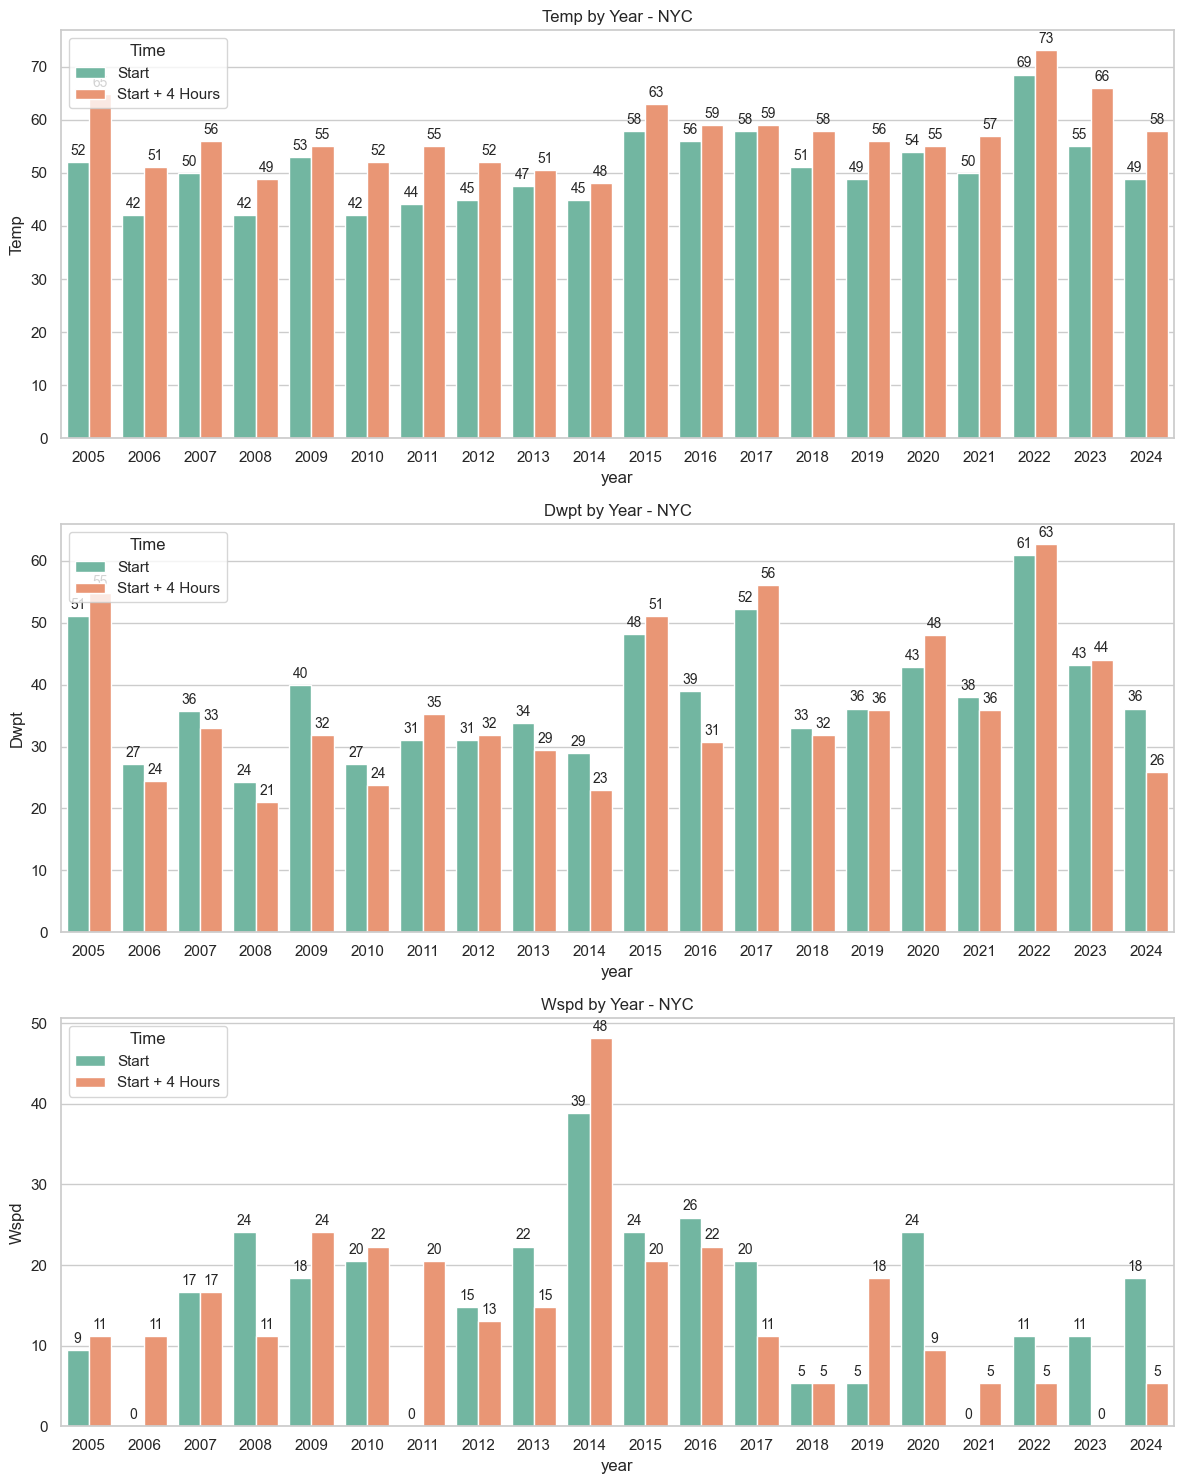

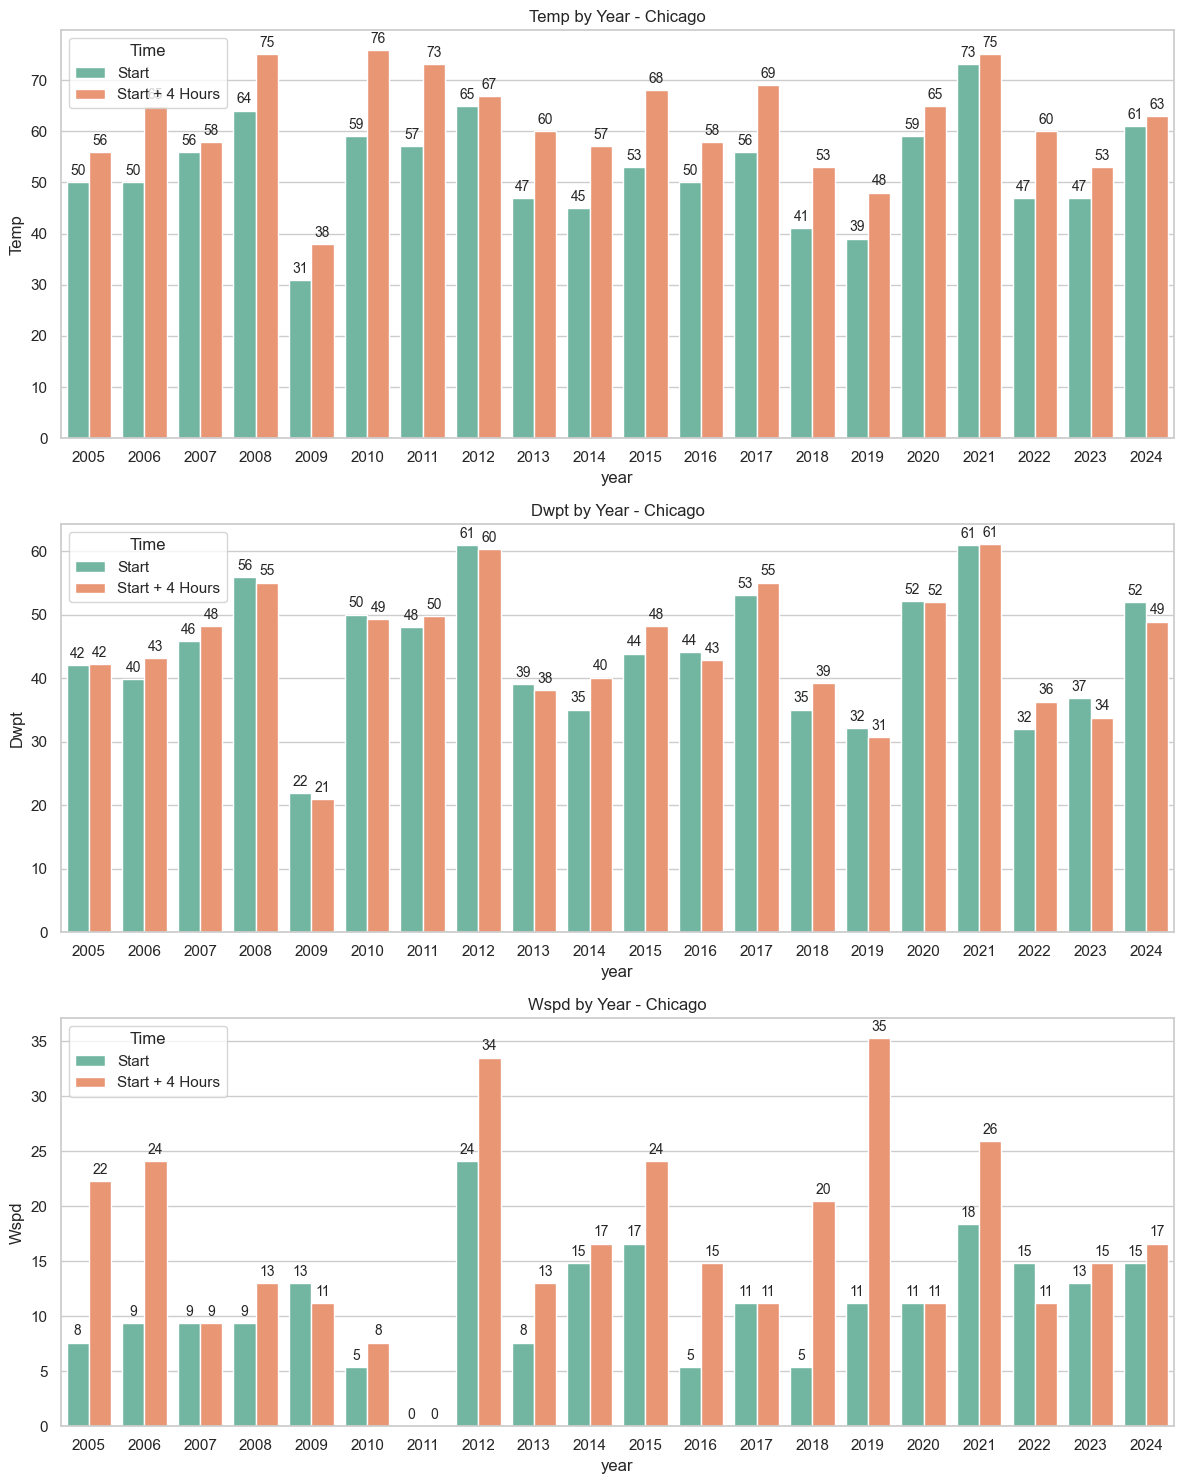

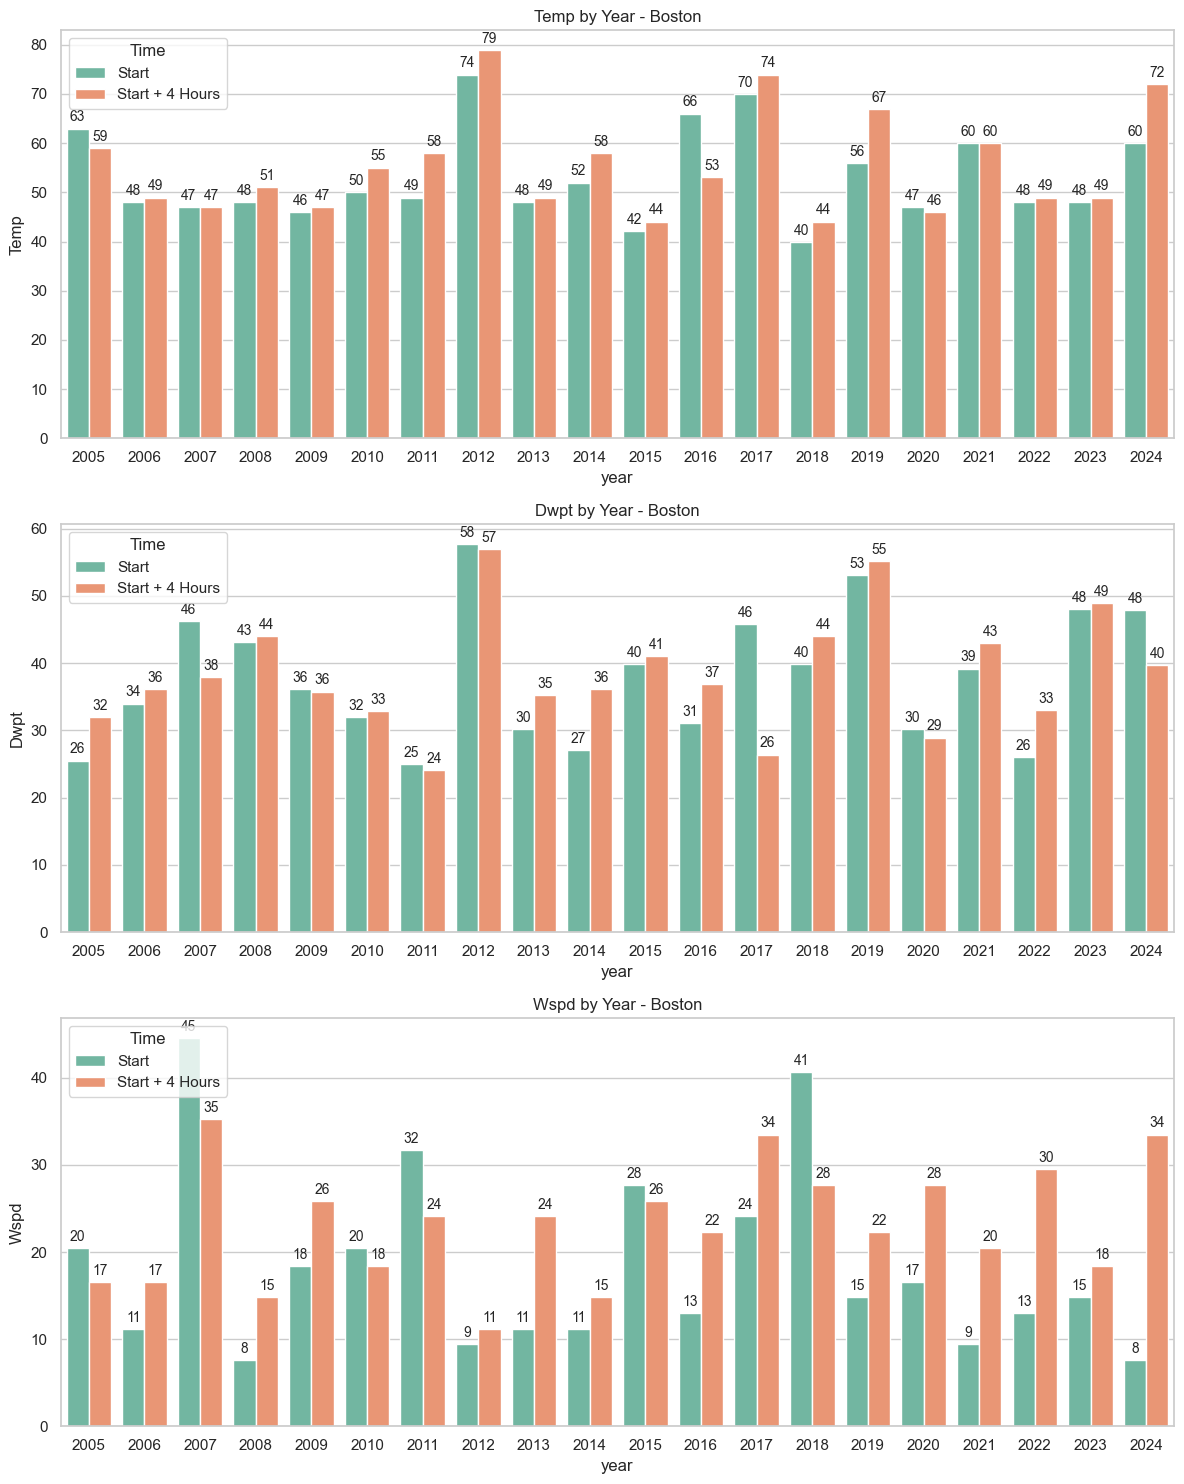

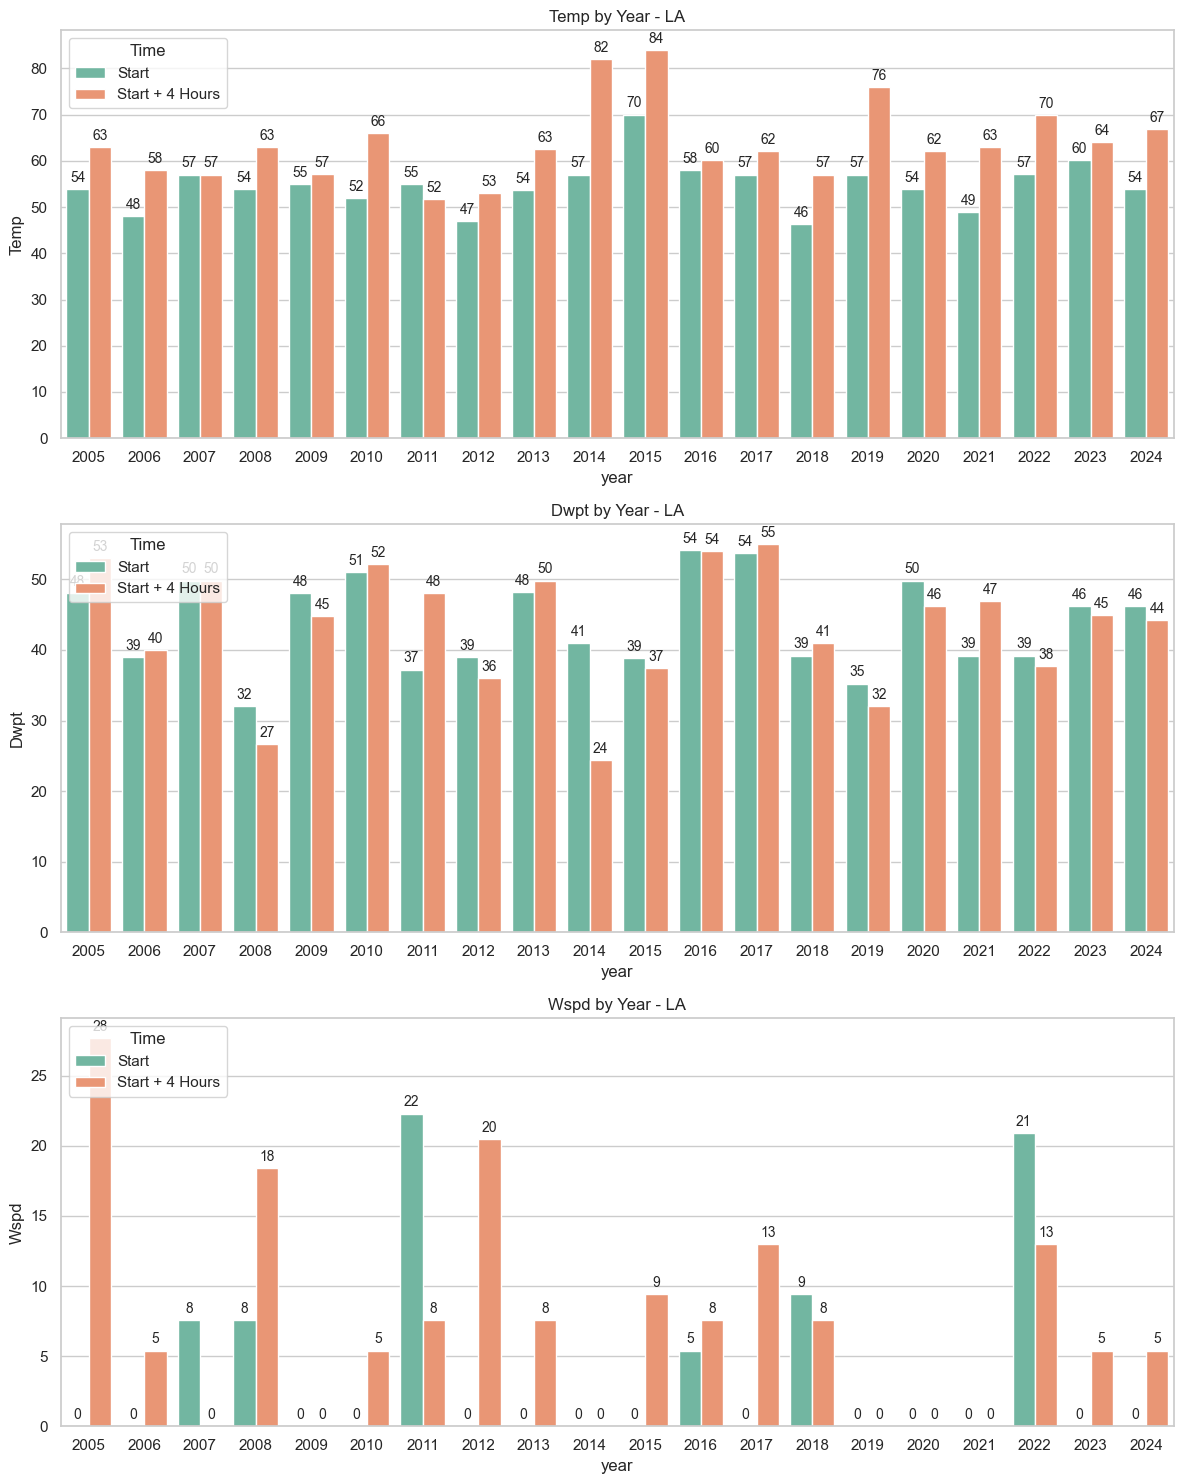

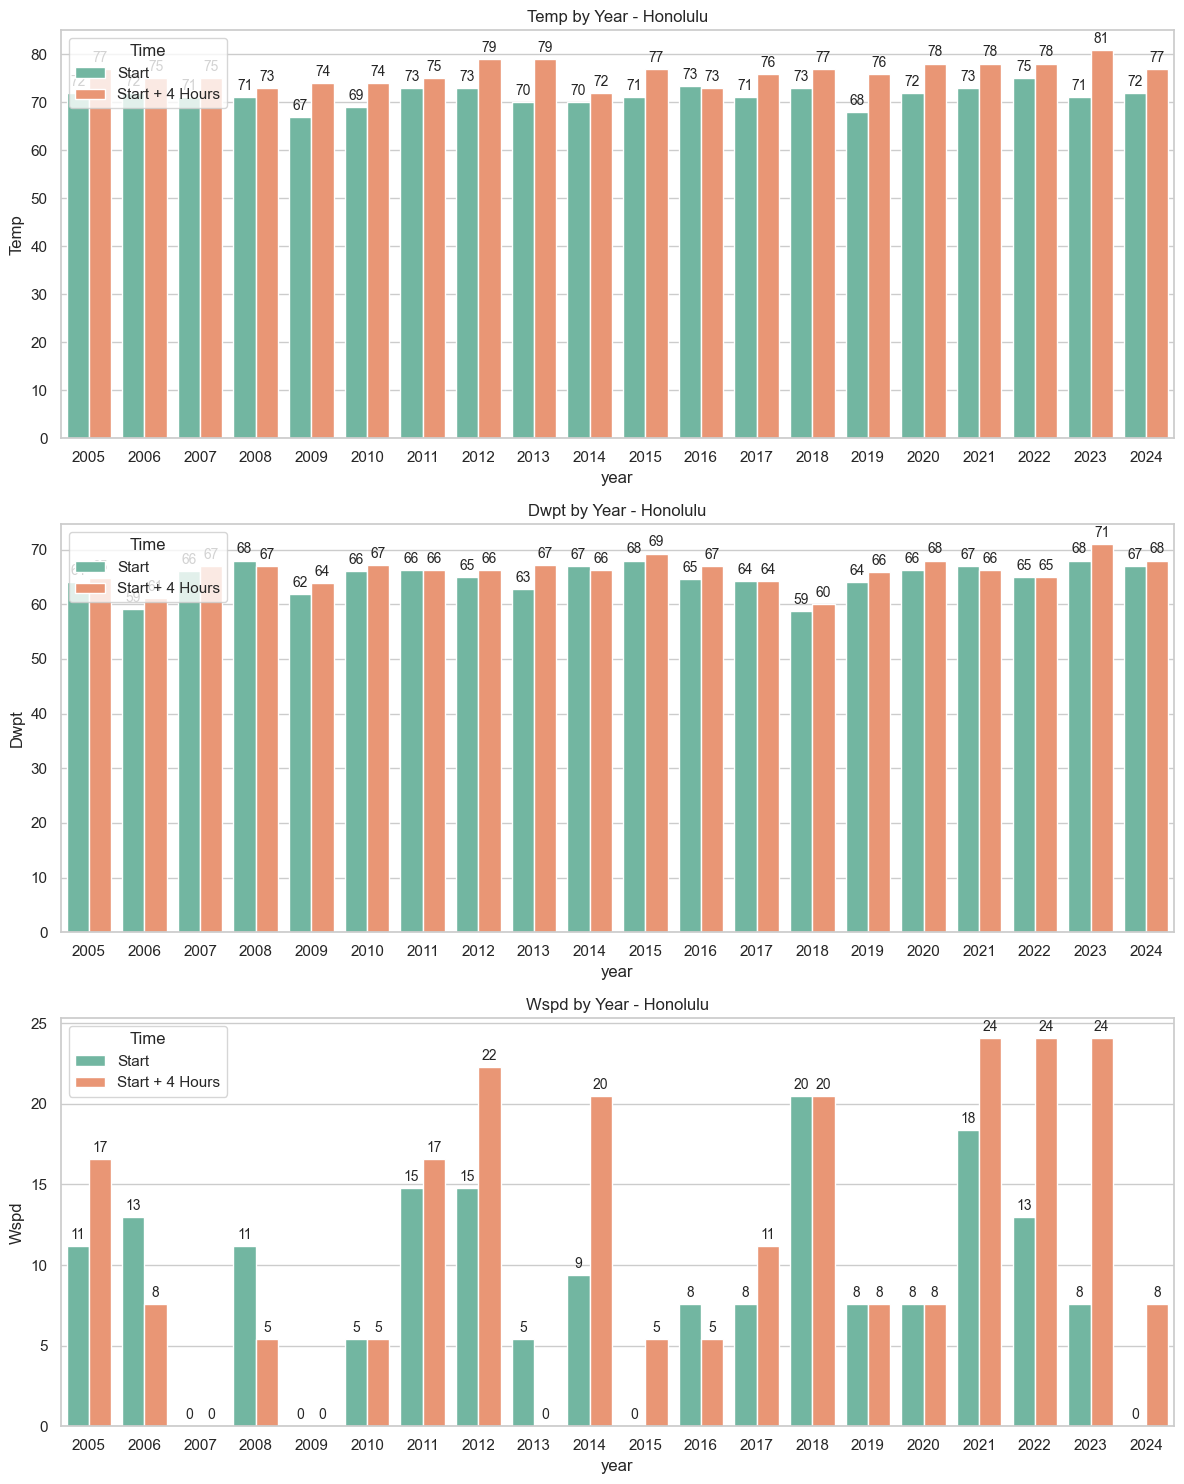

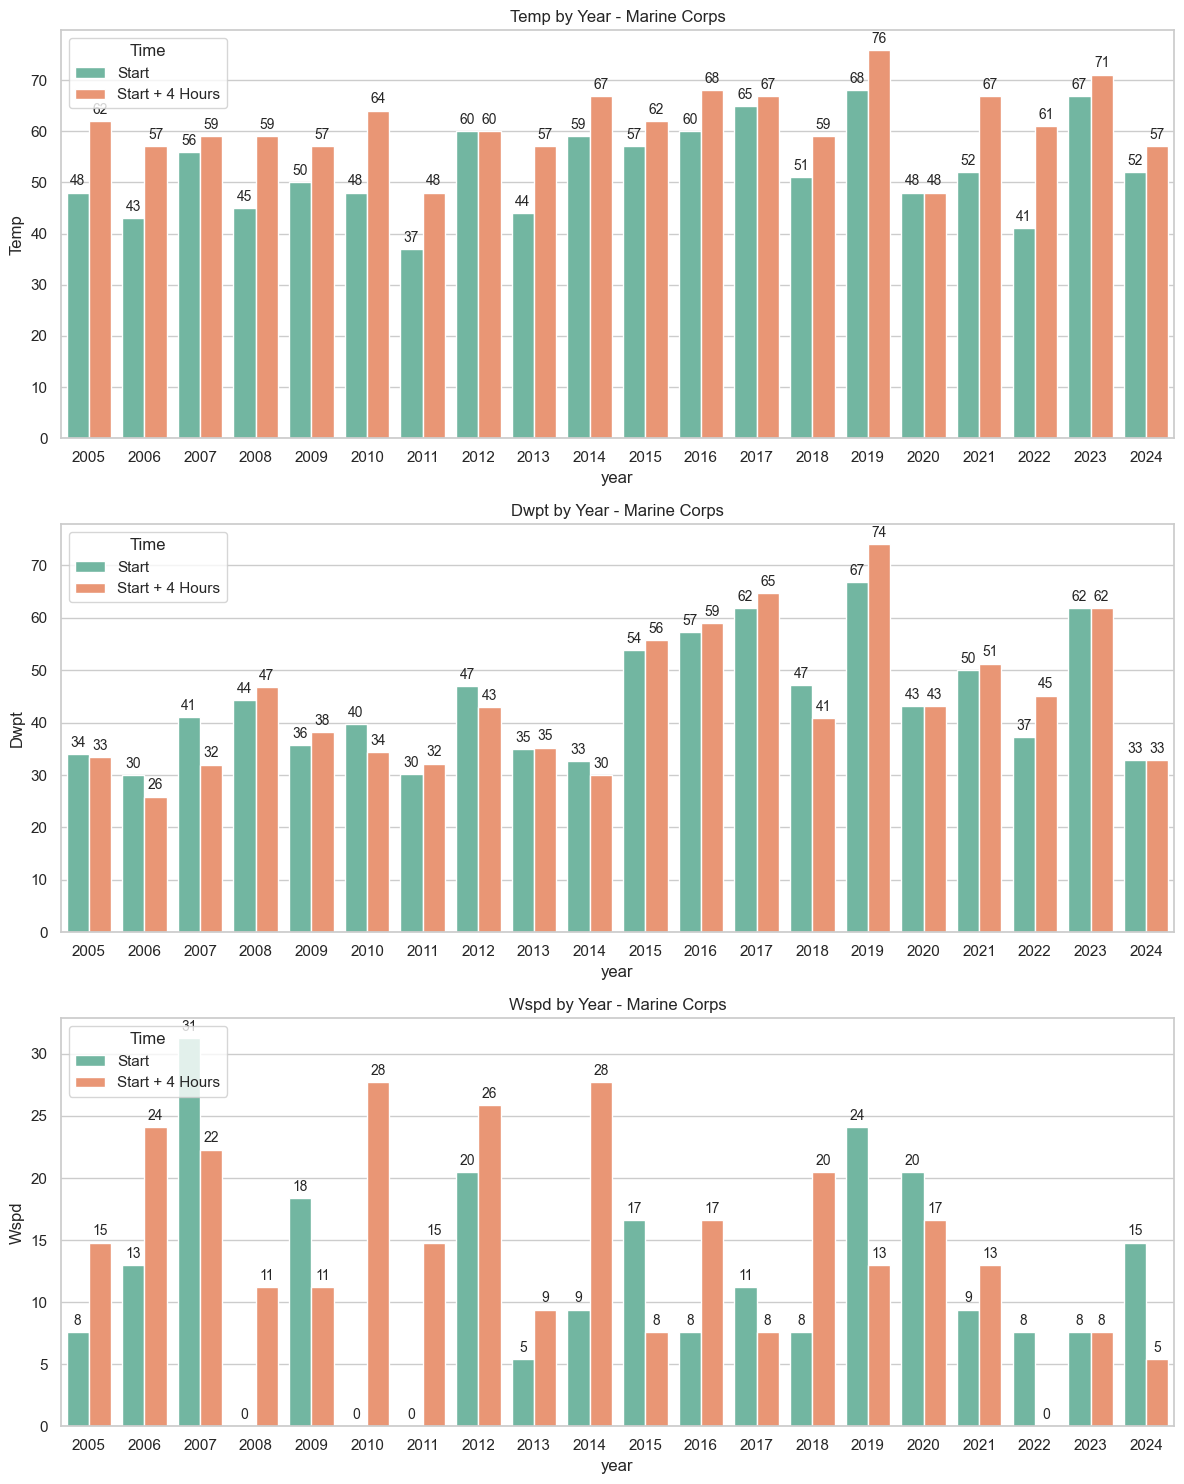

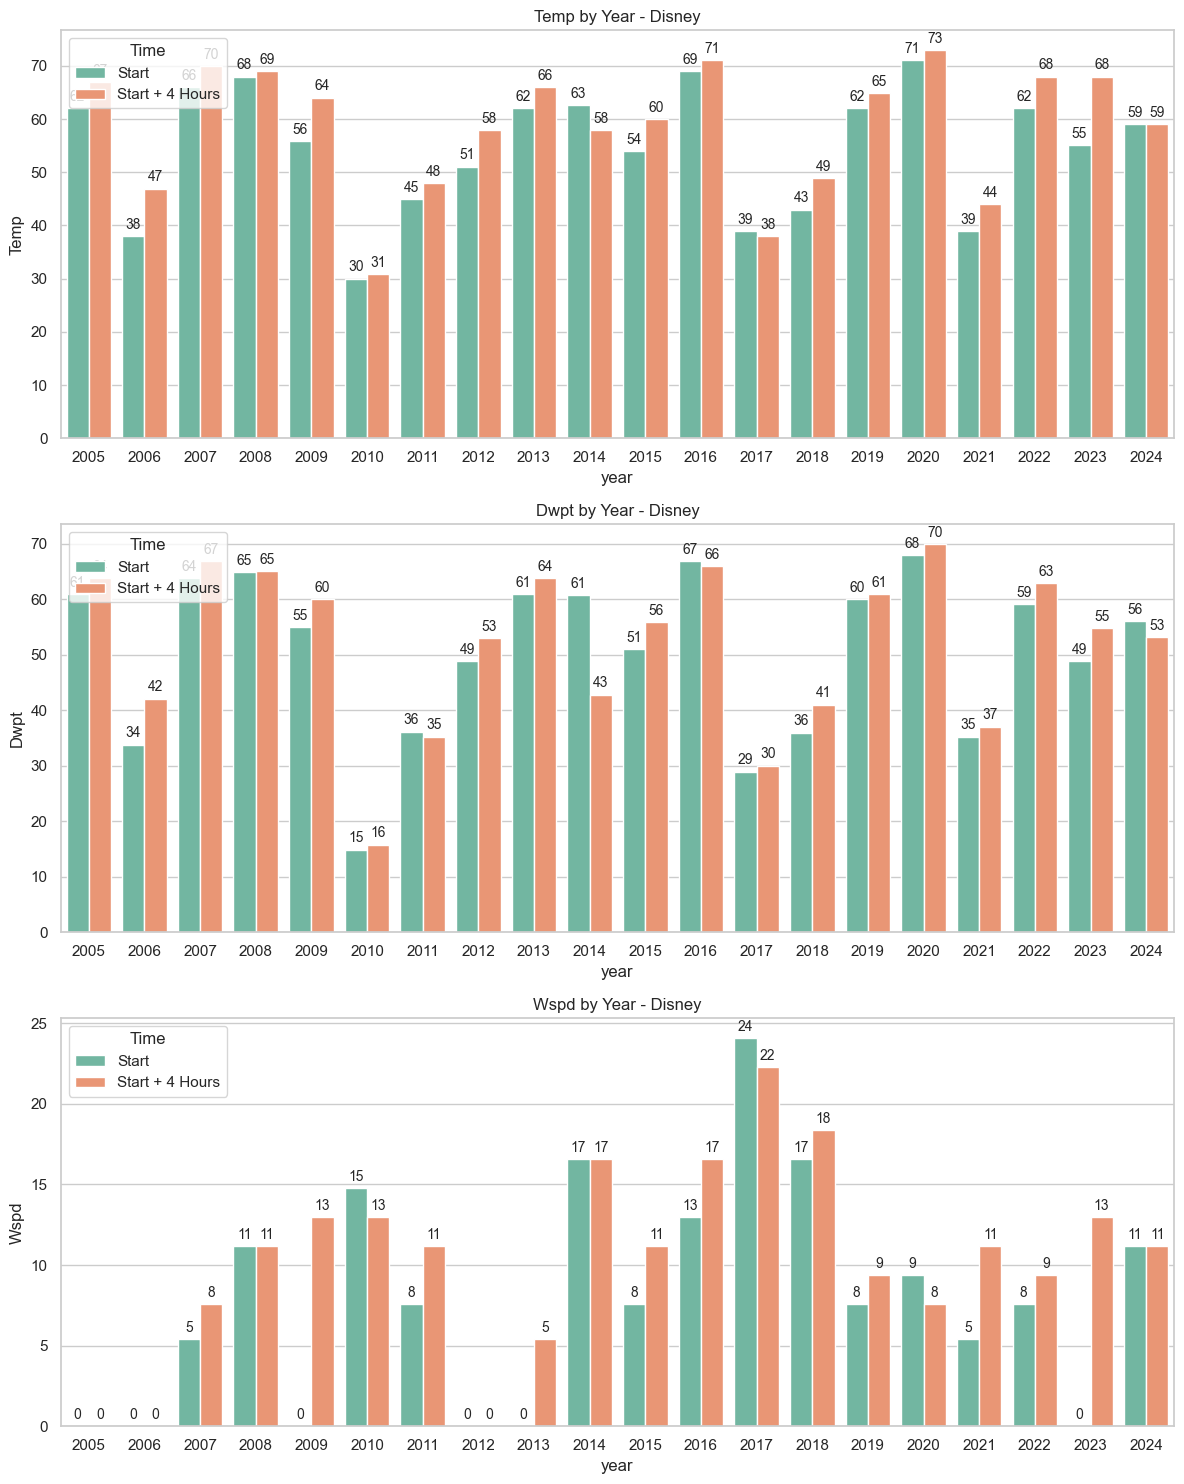

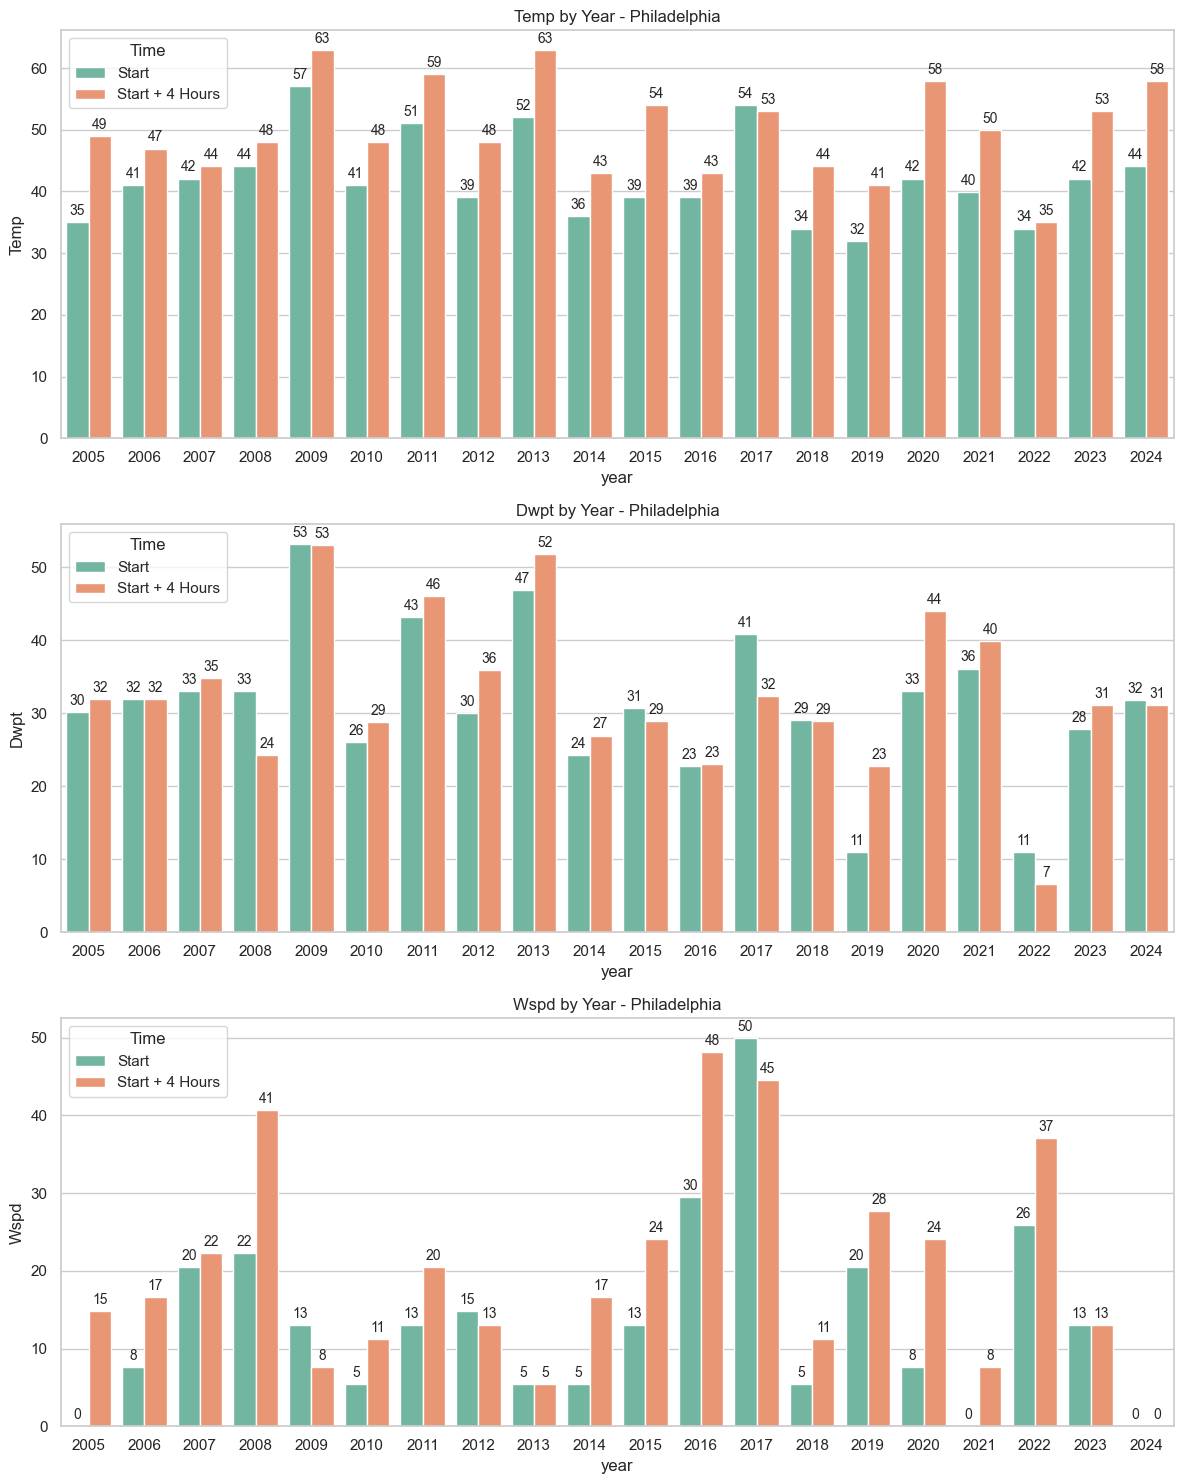

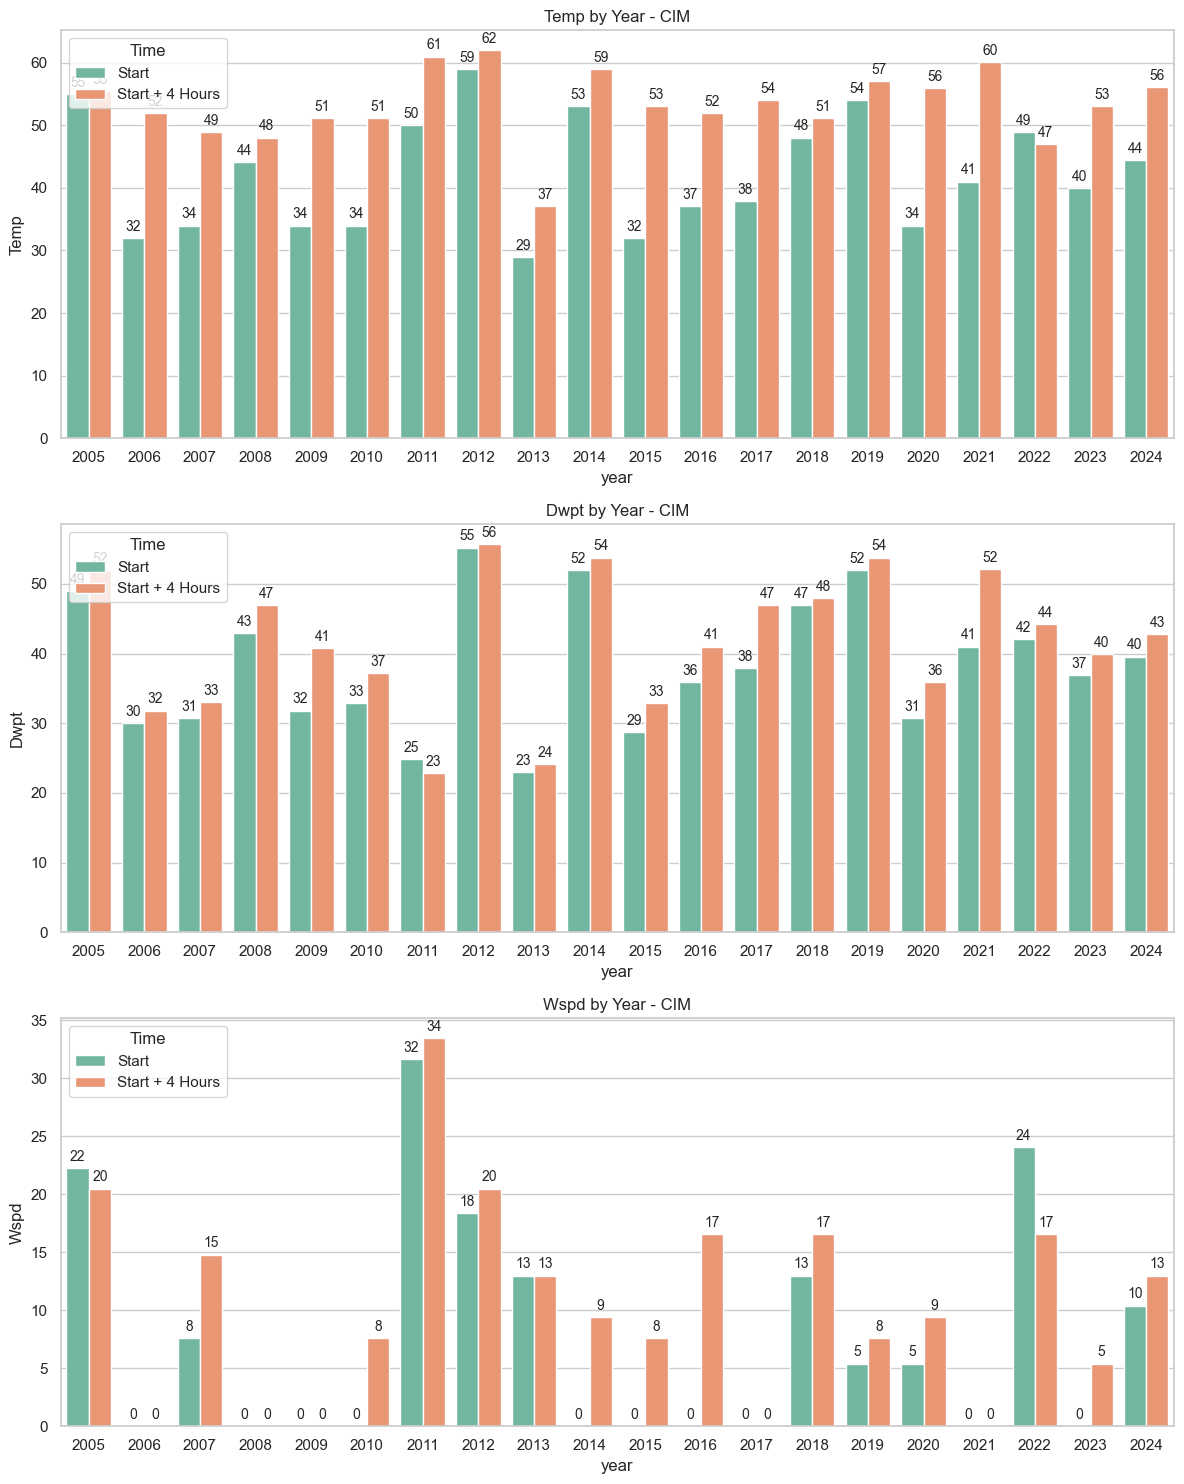

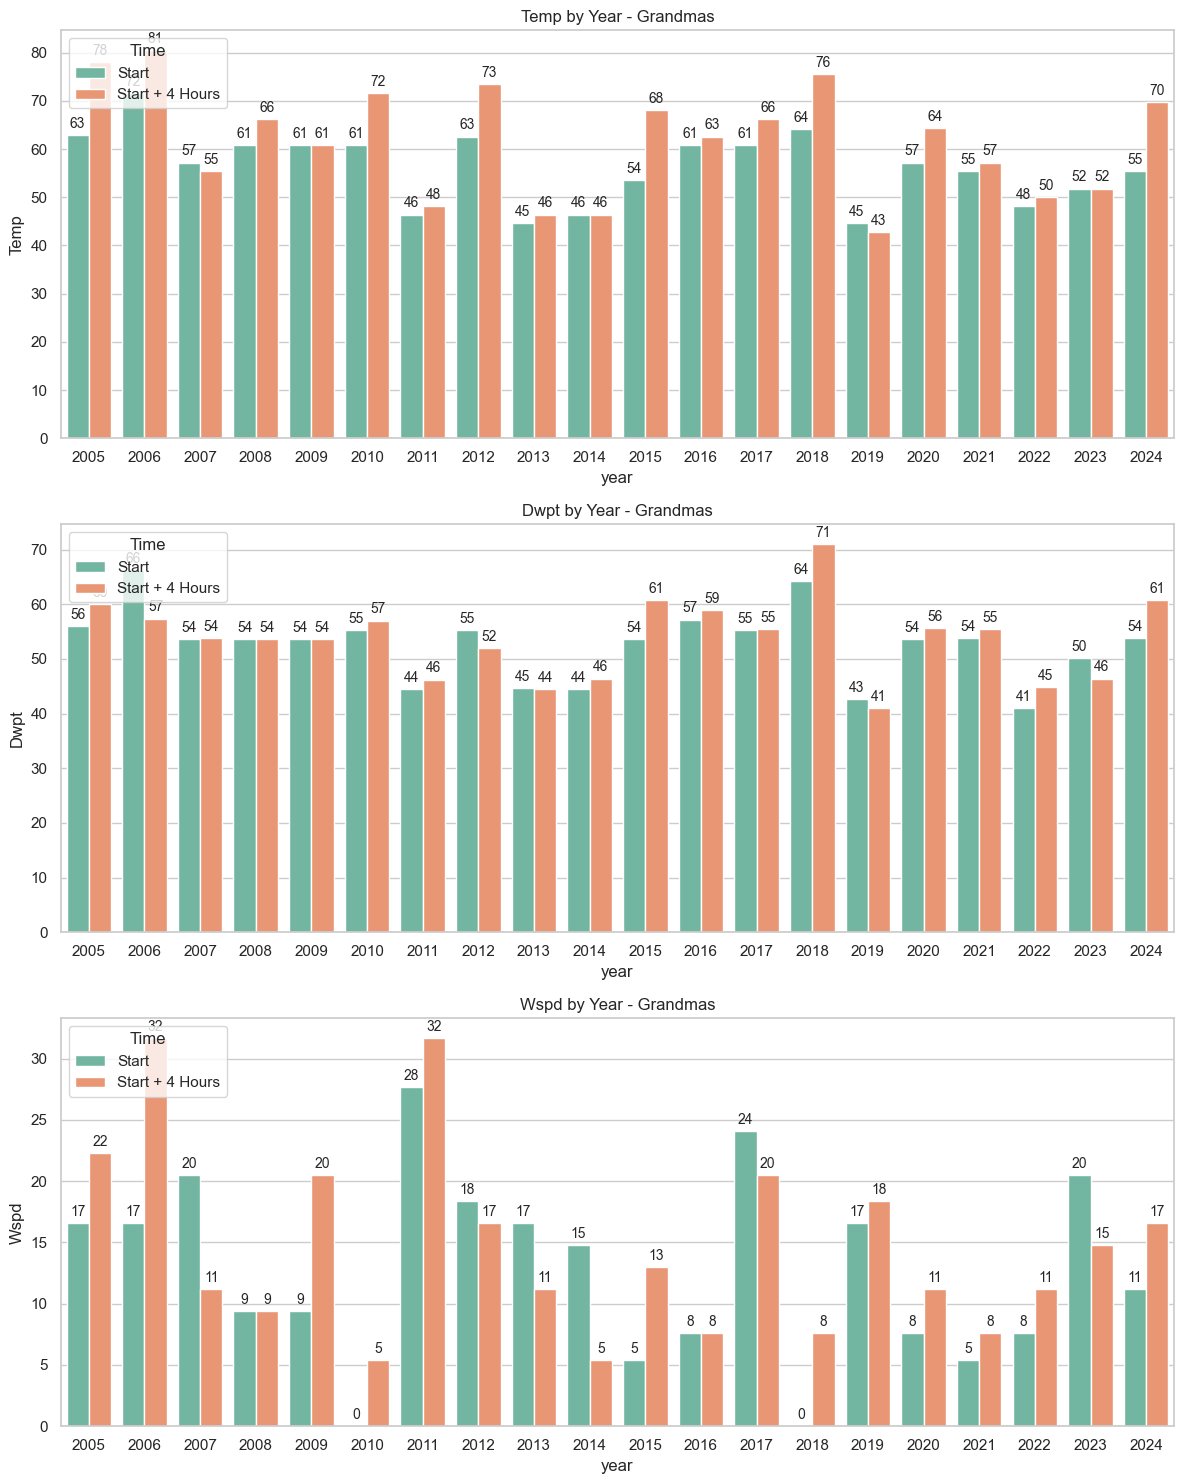

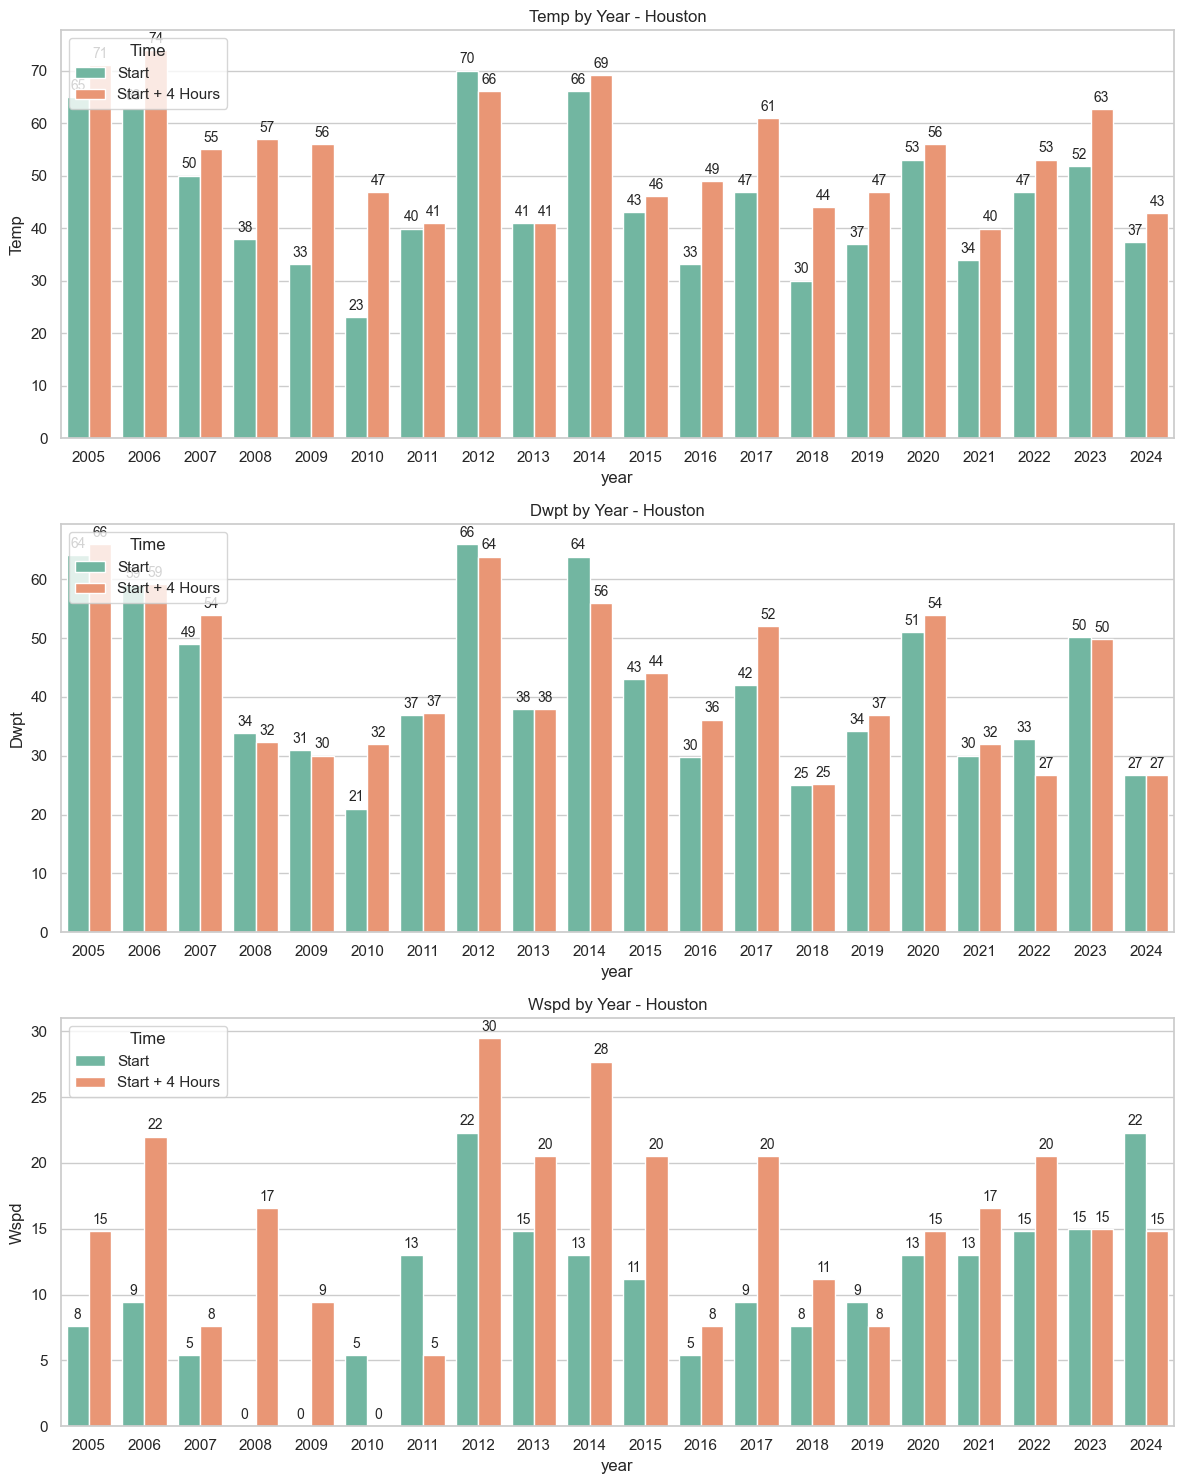

In [375]:
for df in [nyc, chicago, boston, la, honolulu, marine_corps, disney, philadelphia, cim, grandmas, houston]:
    plot_yearly_metrics(df)

In [376]:
def plot_precipitation_percent(df):
    prcp_start_count = (df["prcp_start"] > 0).sum()
    prcp_start_plus_4_count = (df["prcp_start_plus_4"] > 0).sum()

    # Total number of years
    total_years = len(df)

    # Percentages
    prcp_start_percentages = [
        prcp_start_count / total_years * 100,
        (total_years - prcp_start_count) / total_years * 100,
    ]
    prcp_start_plus_4_percentages = [
        prcp_start_plus_4_count / total_years * 100,
        (total_years - prcp_start_plus_4_count) / total_years * 100,
    ]

    # Colors (consistent with bar chart palette)
    sns.set_palette("Set2")
    colors = sns.color_palette("Set2", n_colors=2)

    # Plotting side-by-side donut charts
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Donut chart for precipitation at start
    wedges1, texts1, autotexts1 = axes[0].pie(
        prcp_start_percentages,
        startangle=90,
        colors=colors,
        wedgeprops={"width": 0.3},
        autopct=lambda pct: f"{round(pct)}%",  # Round percentages
        textprops={"fontsize": 10},
    )
    axes[0].set_title(f"Precipitation at Start Time - {df['marathon_name'][0]}", fontsize=14, fontweight="bold")

    # Donut chart for precipitation at start + 4 hours
    wedges2, texts2, autotexts2 = axes[1].pie(
        prcp_start_plus_4_percentages,
        startangle=90,
        colors=colors,
        wedgeprops={"width": 0.3},
        autopct=lambda pct: f"{round(pct)}%",  # Round percentages
        textprops={"fontsize": 10},
    )
    axes[1].set_title(f"Precipitation at Start + 4 Hours - {df['marathon_name'][0]}", fontsize=14, fontweight="bold")

    # Add legends
    legend_labels = ["Precipitation", "No Precipitation"]
    fig.legend(
        wedges1,
        legend_labels,
        loc="upper center",
        fontsize=12,
        title="Legend",
        title_fontsize=13,
        bbox_to_anchor=(0.5, 0.95),
        ncol=2,
    )

    # Match style of previous bar chart
    sns.despine()
    plt.tight_layout()
    plt.show()

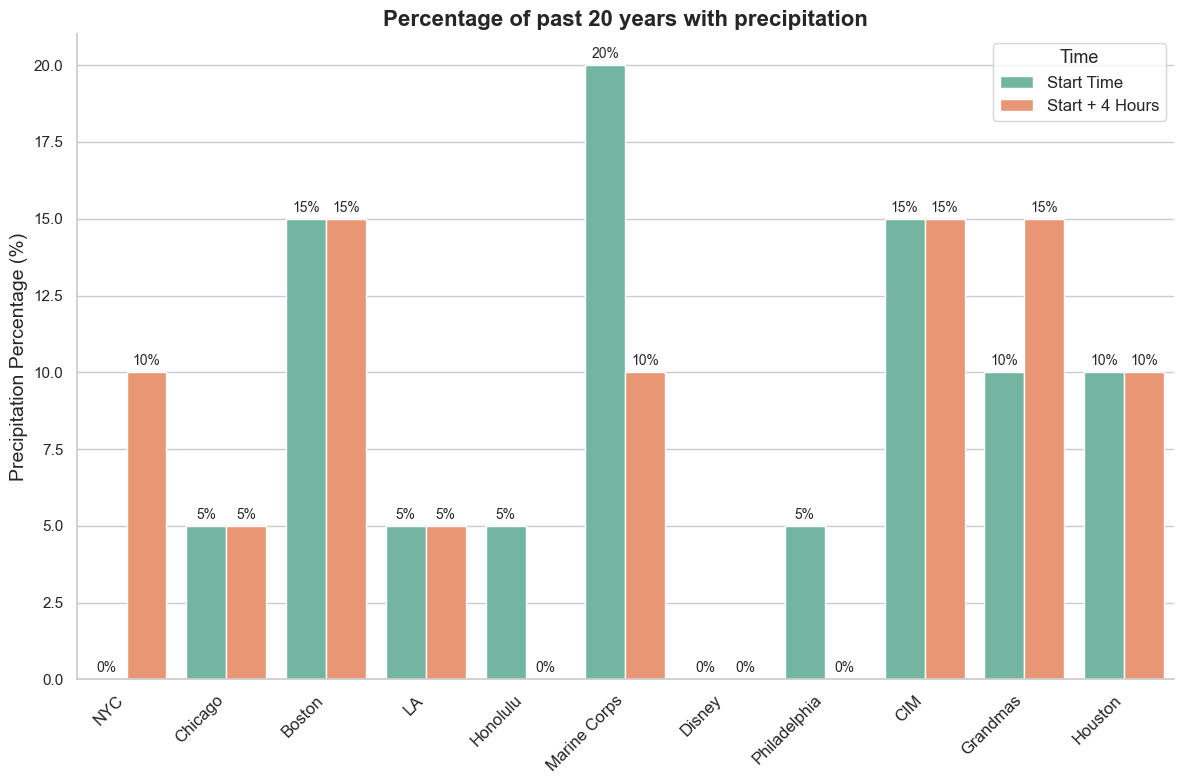

In [382]:
def calculate_precipitation_percentages(df):
    """Calculate the percentage of years with precipitation at start and start + 4 hours."""
    prcp_start_count = (df["prcp_start"] > 0).sum()
    prcp_start_plus_4_count = (df["prcp_start_plus_4"] > 0).sum()

    total_years = len(df)
    prcp_start_percentage = prcp_start_count / total_years * 100
    prcp_start_plus_4_percentage = prcp_start_plus_4_count / total_years * 100

    return {
        "marathon_name": df["marathon_name"].iloc[0],
        "prcp_start": prcp_start_percentage,
        "prcp_start_plus_4": prcp_start_plus_4_percentage,
    }

# List of marathon dataframes
marathon_dataframes = [nyc, chicago, boston, la, honolulu, marine_corps, disney, philadelphia, cim, grandmas, houston]

# Collect precipitation percentages
precipitation_data = [calculate_precipitation_percentages(df) for df in marathon_dataframes]

# Create a DataFrame for plotting
precipitation_df = pd.DataFrame(precipitation_data)

# Reshape data for grouped bar chart
precipitation_melted = precipitation_df.melt(
    id_vars=["marathon_name"],
    value_vars=["prcp_start", "prcp_start_plus_4"],
    var_name="Time",
    value_name="Precipitation Percentage",
)

# Map readable labels
time_labels = {
    "prcp_start": "Start Time",
    "prcp_start_plus_4": "Start + 4 Hours",
}
precipitation_melted["Time"] = precipitation_melted["Time"].map(time_labels)

# Plot the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=precipitation_melted,
    x="marathon_name",
    y="Precipitation Percentage",
    hue="Time",
    palette="Set2",
)

# Add data labels
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.0f%%", fontsize=10, padding=3)

# Customize the plot
plt.title("Percentage of past 20 years with precipitation", fontsize=16, fontweight="bold")
plt.xlabel("")
plt.ylabel("Precipitation Percentage (%)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Time", fontsize=12, title_fontsize=13)
sns.despine()

plt.tight_layout()
plt.show()

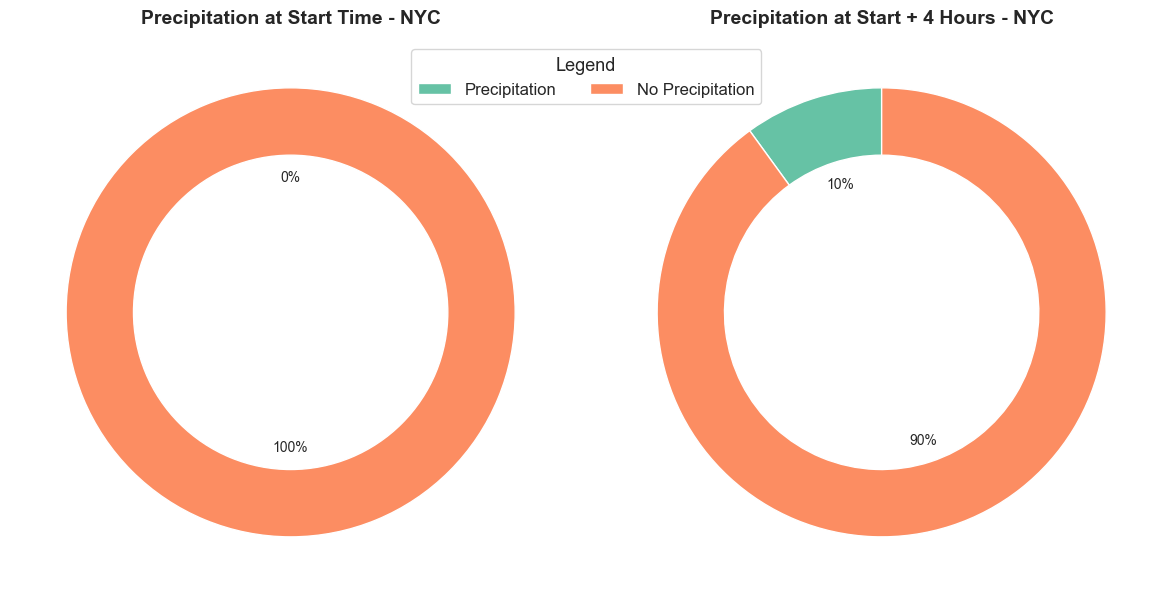

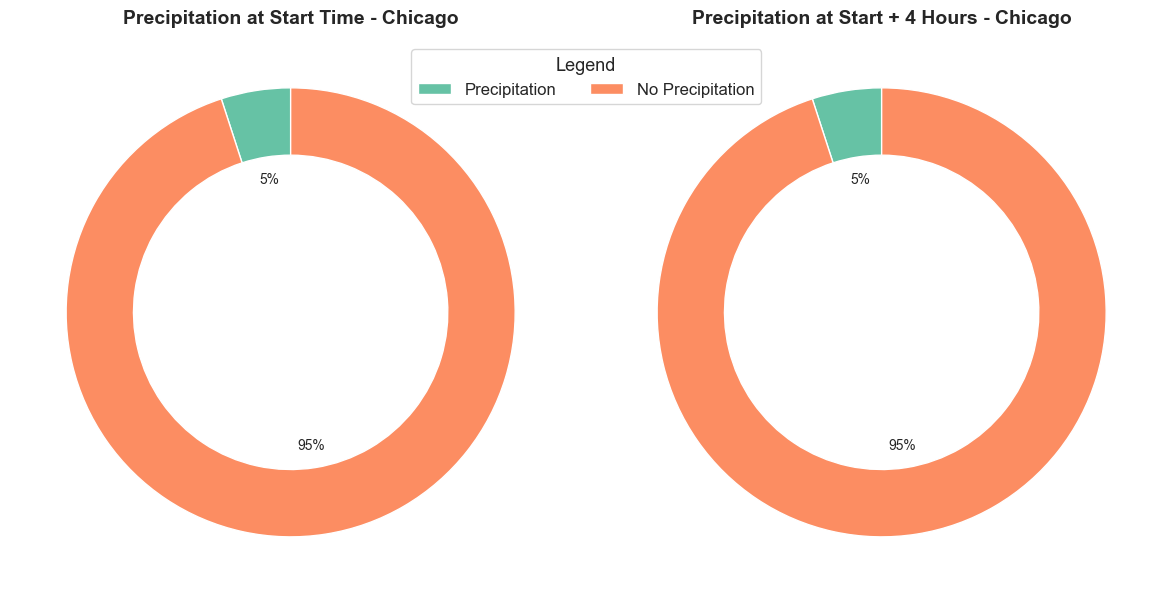

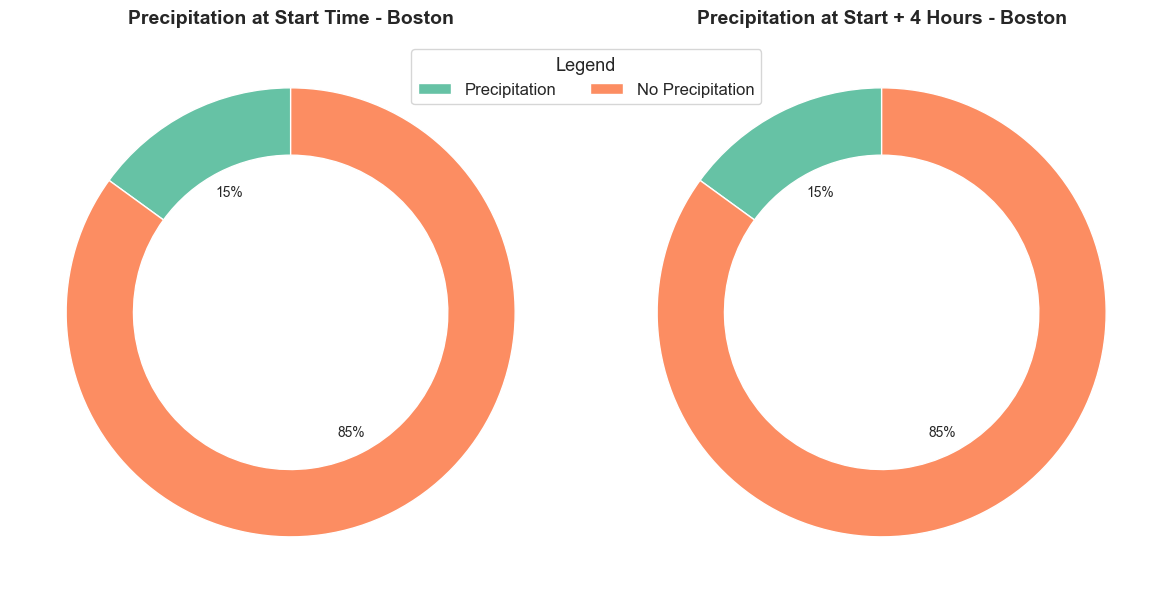

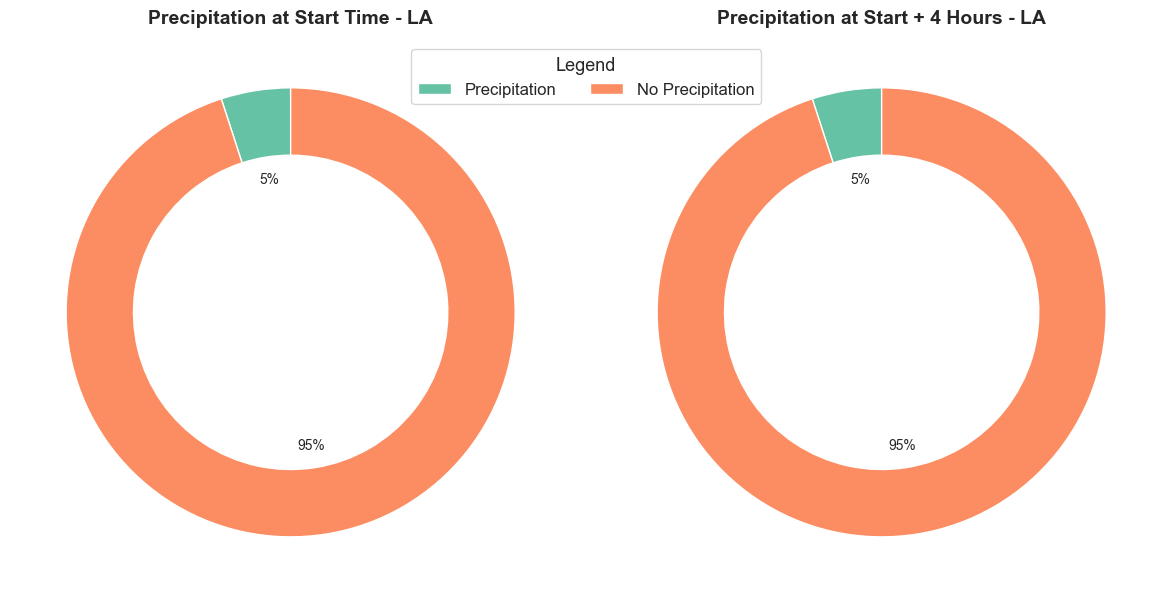

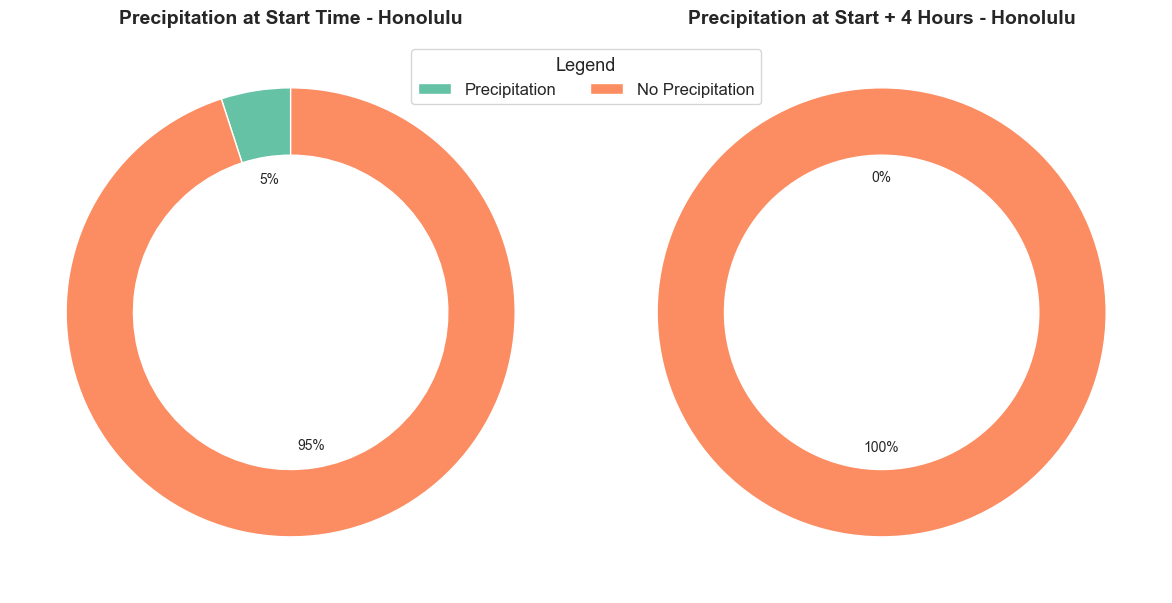

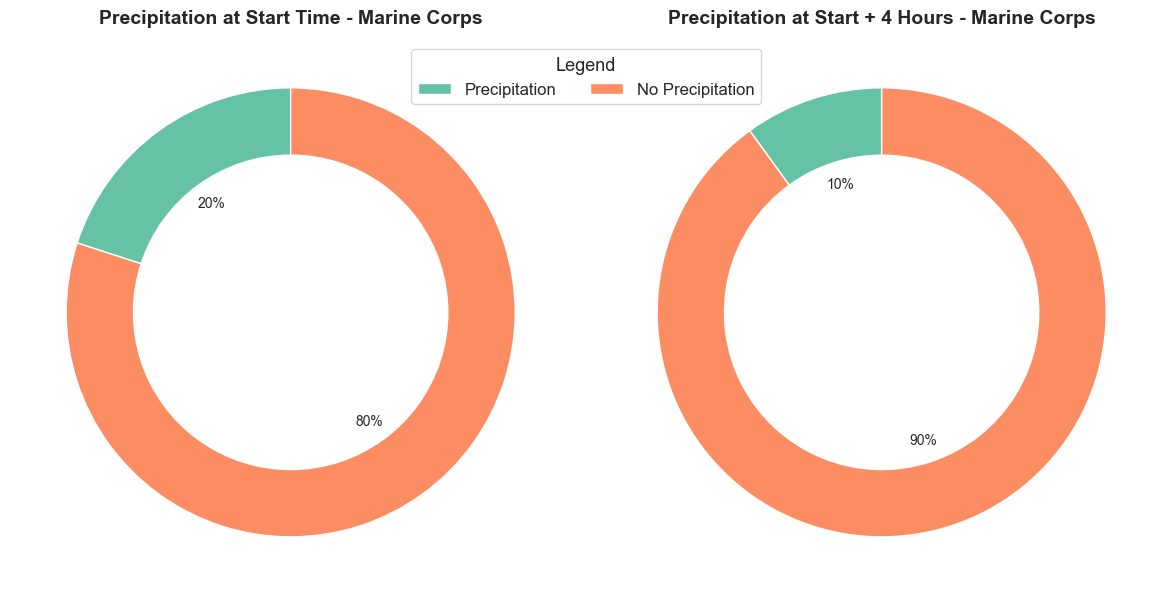

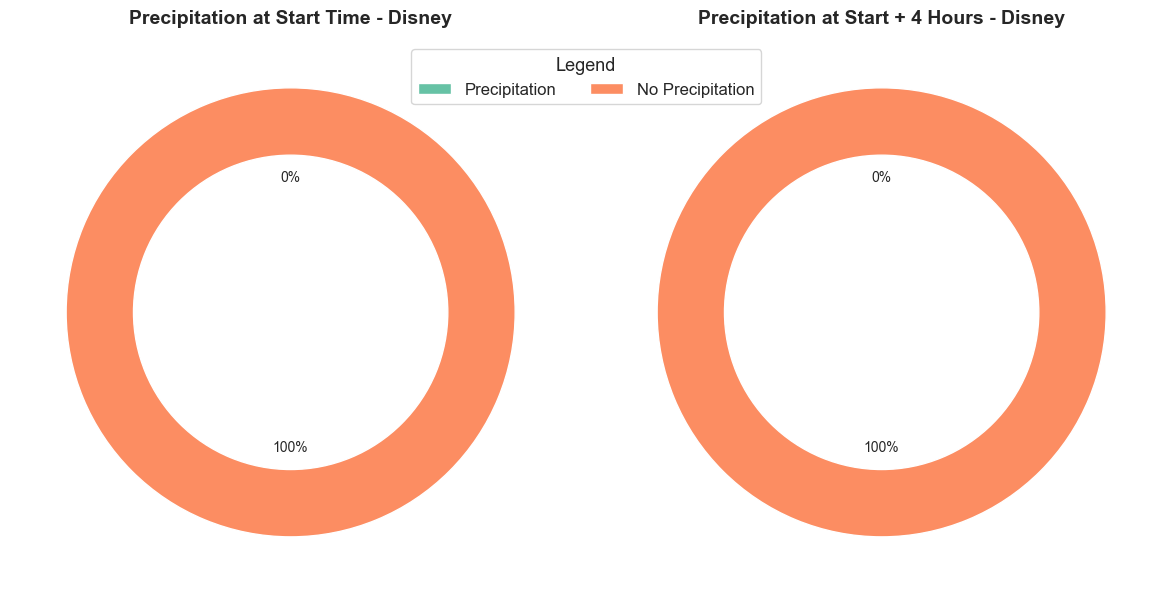

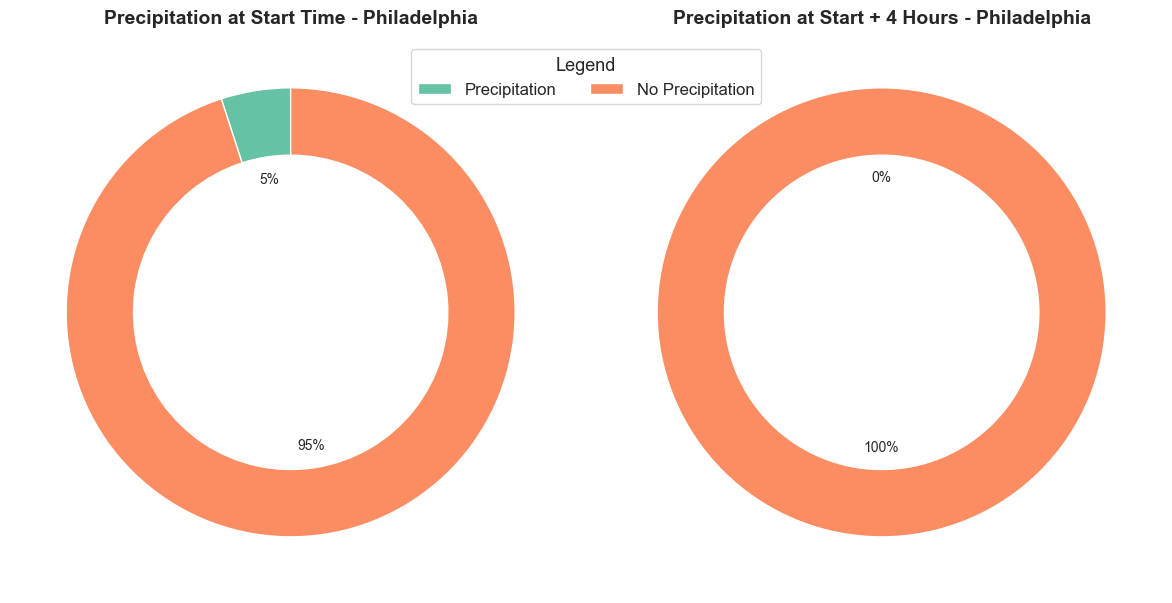

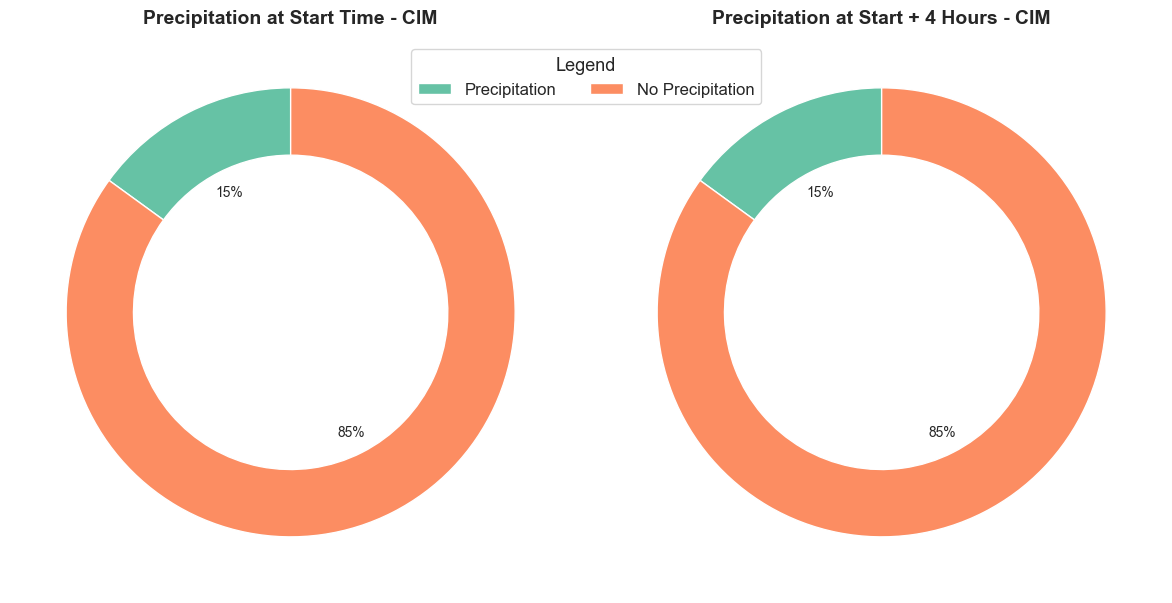

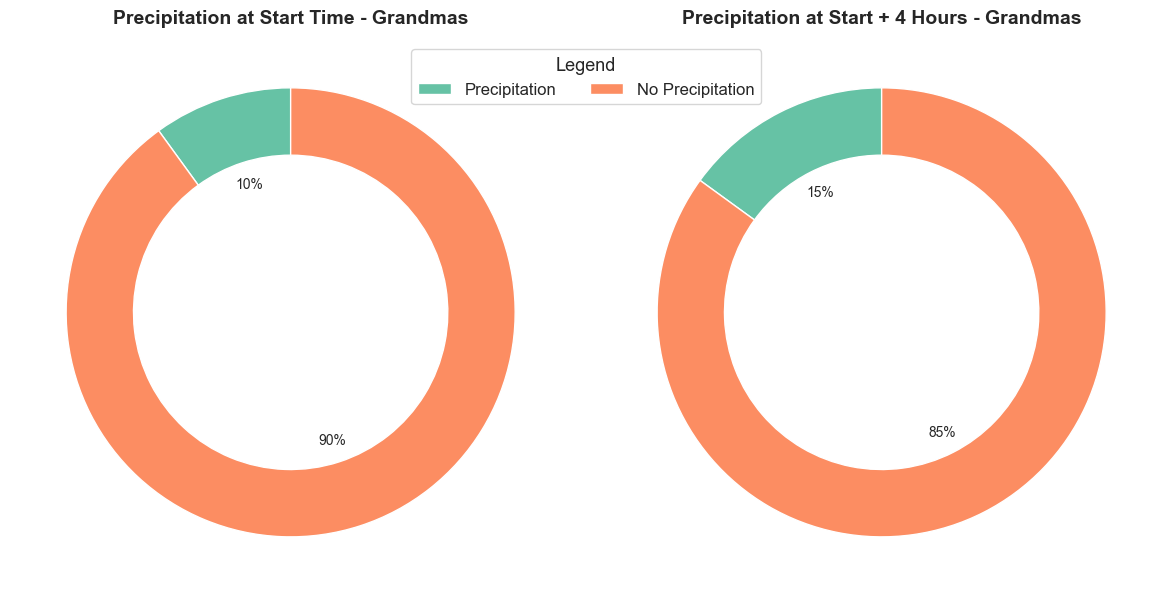

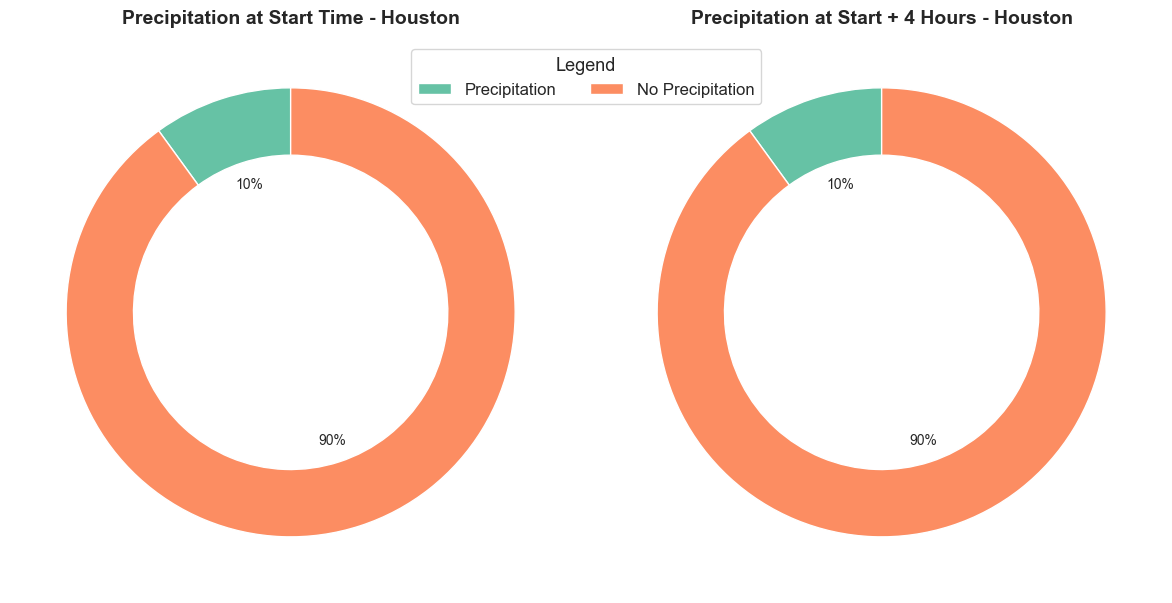

In [377]:
for df in [nyc, chicago, boston, la, honolulu, marine_corps, disney, philadelphia, cim, grandmas, houston]:
    plot_precipitation_percent(df)

In [371]:
weather_agg = []

for df_agg in [nyc_agg, chicago_agg, boston_agg, la_agg, honolulu_agg, marine_corps_agg, philadelphia_agg, cim_agg, grandmas_agg, houston_agg]:
    weather_agg.append(df_agg)

weather_agg_all = pd.concat(weather_agg)

<Figure size 800x600 with 0 Axes>

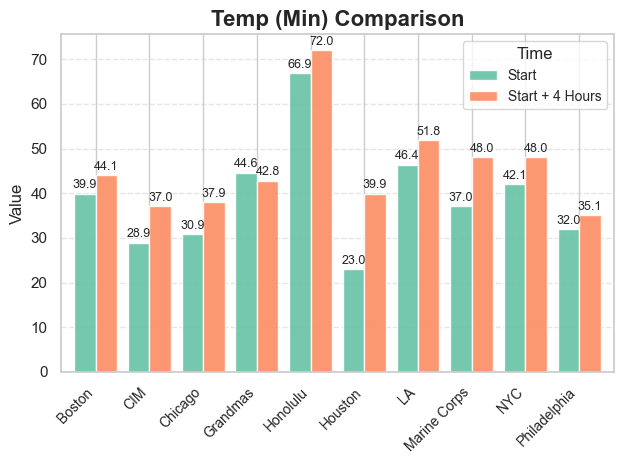

<Figure size 800x600 with 0 Axes>

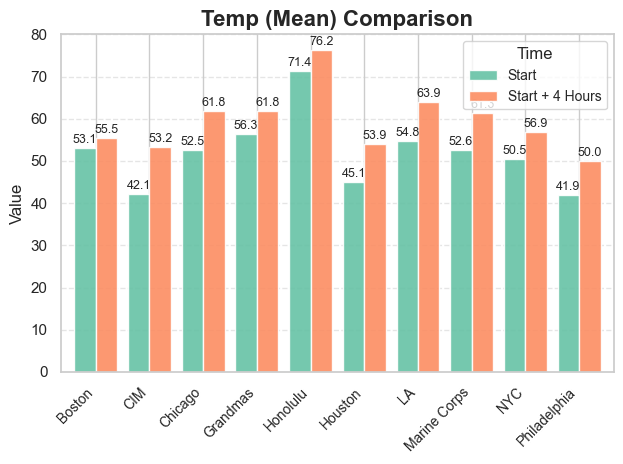

<Figure size 800x600 with 0 Axes>

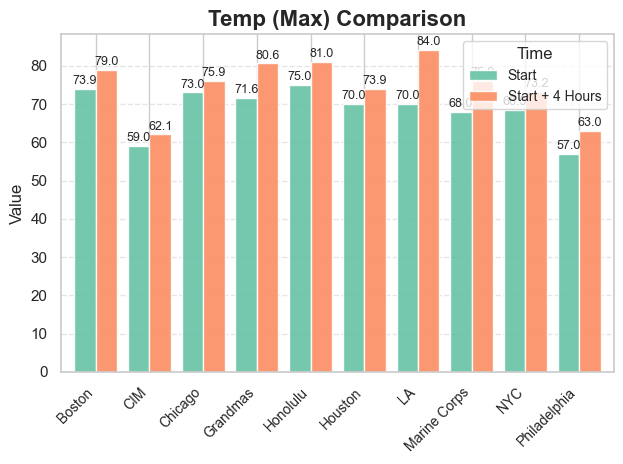

<Figure size 800x600 with 0 Axes>

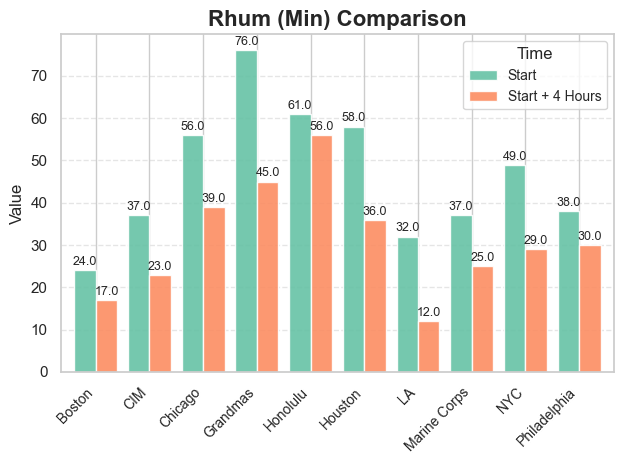

<Figure size 800x600 with 0 Axes>

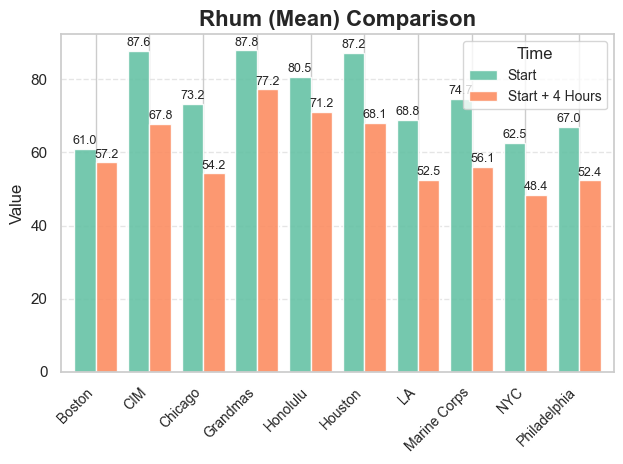

<Figure size 800x600 with 0 Axes>

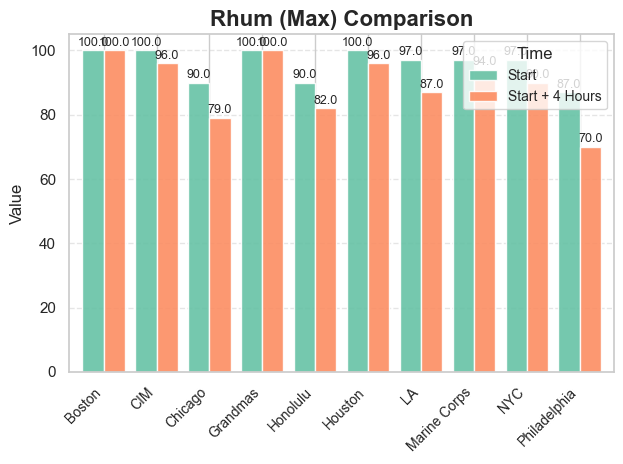

<Figure size 800x600 with 0 Axes>

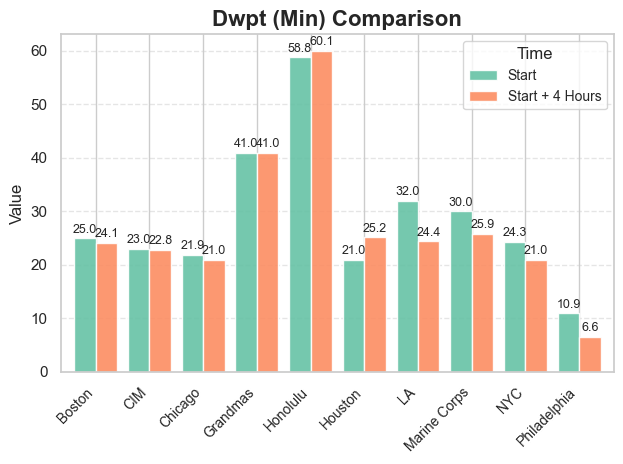

<Figure size 800x600 with 0 Axes>

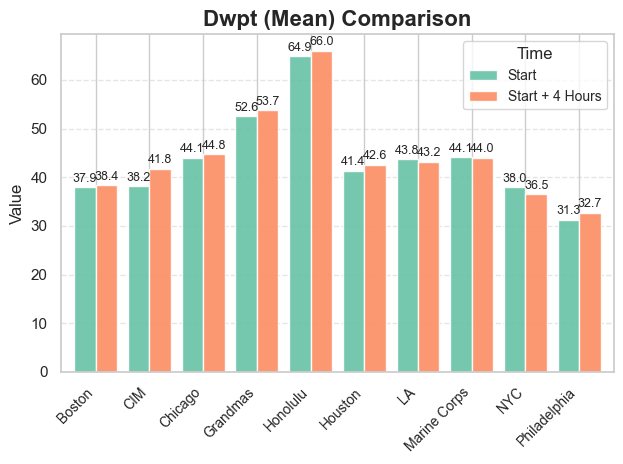

<Figure size 800x600 with 0 Axes>

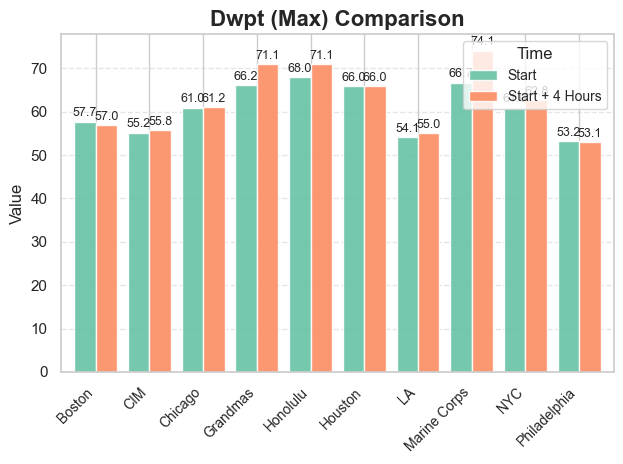

<Figure size 800x600 with 0 Axes>

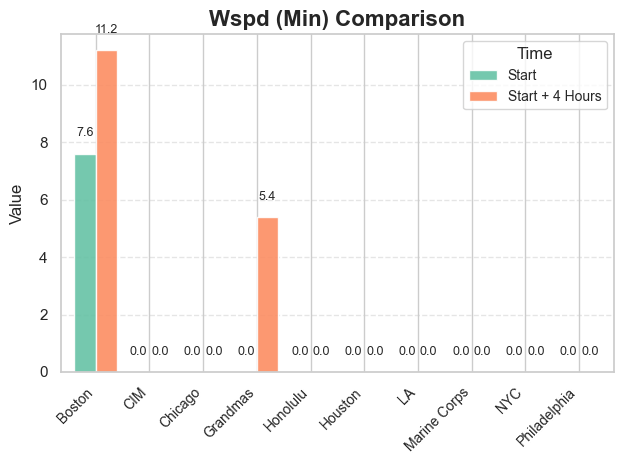

<Figure size 800x600 with 0 Axes>

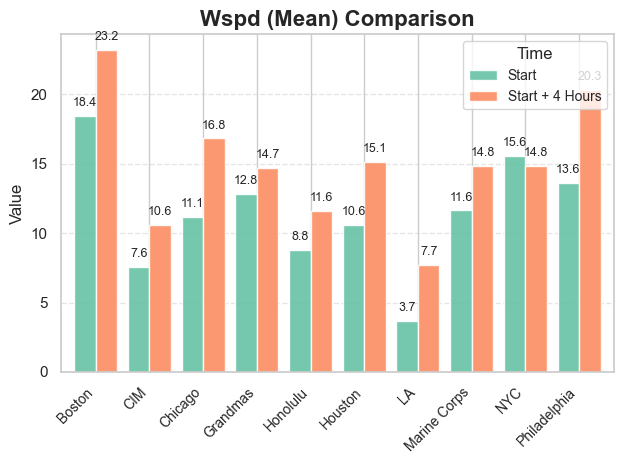

<Figure size 800x600 with 0 Axes>

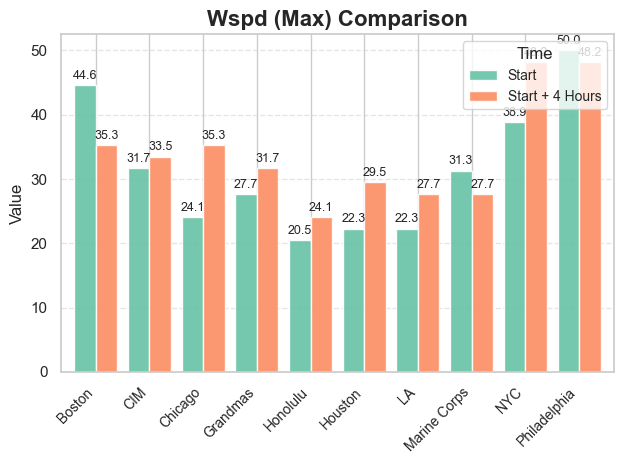

In [372]:
# Pivot the data
pivot_df = weather_agg_all.pivot_table(
    index='marathon_name',
    columns='index',
    values=[
        'temp_start', 'temp_start_plus_4', 
        'rhum_start', 'rhum_start_plus_4',
        'dwpt_start', 'dwpt_start_plus_4', 
        'wspd_start', 'wspd_start_plus_4'
    ],
    aggfunc='first'
)

# Define variables for plotting
metrics = ['temp', 'rhum', 'dwpt', 'wspd']  # Metric prefixes
stats = ['min', 'mean', 'max']  # Aggregations
colors = sns.color_palette("Set2", n_colors=2)

# Loop through each metric and statistic combination
for metric in metrics:
    for stat in stats:
        # Create a new figure for each chart
        plt.figure(figsize=(8, 6))
        
        # Access data for the metric and stat
        start_data = pivot_df[f'{metric}_start'][stat]
        start_plus_4_data = pivot_df[f'{metric}_start_plus_4'][stat]

        # Combine data for bar chart
        df_to_plot = pd.DataFrame({
            'Start': start_data,
            'Start + 4 Hours': start_plus_4_data
        })

        # Create bar chart
        bars = df_to_plot.plot(kind='bar', color=colors, width=0.8, alpha=0.9)

        # Add data labels
        for i, bar_group in enumerate(bars.containers):
            for bar in bar_group:
                height = bar.get_height()
                bars.text(bar.get_x() + bar.get_width() / 2, height + 0.5, 
                          f'{height:.1f}', ha='center', va='bottom', fontsize=9)

        # Set title, labels, and legend
        title = f"{metric.capitalize()} ({stat.capitalize()}) Comparison"
        plt.title(title, fontsize=16, fontweight='bold')
        plt.ylabel("Value", fontsize=12)
        plt.xticks(rotation=45, ha="right", fontsize=10)
        plt.xlabel("")  # Remove x-axis label
        plt.legend(title="Time", fontsize=10, loc='upper right')
        plt.grid(axis='y', linestyle='--', alpha=0.5)

        # Display plot
        plt.tight_layout()
        plt.show()


In [353]:
pivot_df

dwpt_start                dwpt_start_plus_4                 \
index                max    mean    min               max    mean    min   
marathon_name                                                              
Boston             57.74  37.913  24.98             57.02  38.426  24.08   
CIM                55.22  38.210  23.00             55.76  41.801  22.82   
Chicago            60.98  44.051  21.92             61.16  44.771  21.02   
Grandmas           66.20  52.601  41.00             71.06  53.735  41.00   
Honolulu           68.00  64.931  58.82             71.06  66.047  60.08   
LA                 54.14  43.763  32.00             55.04  43.205  24.44   
Marine Corps       66.74  44.069  30.02             74.12  43.988  25.88   
NYC                60.98  37.994  24.26             62.78  36.545  21.02   
Philadelphia       53.24  31.316  10.94             53.06  32.729   6.62   

              rhum_start              rhum_start_plus_4  ... temp_start  \
index                max   mean   min               max  ...        min   
marathon_name                                            ...              
Boston             100.0  60.95  24.0             100.0  ...      39.92   
CIM                100.0  87.60  37.0              96.0  ...      28.94   
Chicago             90.0  73.20  56.0              79.0  ...      30.92   
Grandmas           100.0  87.85  76.0             100.0  ...      44.60   
Honolulu            90.0  80.50  61.0              82.0  ...      66.92   
LA                  97.0  68.80  32.0              87.0  ...      46.40   
Marine Corps        97.0  74.65  37.0              94.0  ...      37.04   
NYC                 97.0  62.55  49.0              90.0  ...      42.08   
Philadelphia        87.0  66.95  38.0              70.0  ...      32.00   

              temp_start_plus_4                wspd_start               \
index                       max    mean    min        max    mean  min   
marathon_name                                                            
Boston                    78.98  55.481  44.06       44.6  18.400  7.6   
CIM                       62.06  53.240  37.04       31.7   7.565  0.0   
Chicago                   75.92  61.844  37.94       24.1  11.135  0.0   
Grandmas                  80.60  61.772  42.80       27.7  12.800  0.0   
Honolulu                  80.96  76.199  71.96       20.5   8.755  0.0   
LA                        84.02  63.923  51.80       22.3   3.660  0.0   
Marine Corps              75.92  61.304  48.02       31.3  11.630  0.0   
NYC                       73.22  56.876  48.02       38.9  15.560  0.0   
Philadelphia              62.96  50.045  35.06       50.0  13.615  0.0   

              wspd_start_plus_4                
index                       max    mean   min  
marathon_name                                  
Boston                     35.3  23.155  11.2  
CIM                        33.5  10.605   0.0  
Chicago                    35.3  16.815   0.0  
Grandmas                   31.7  14.695   5.4  
Honolulu                   24.1  11.600   0.0  
LA                         27.7   7.700   0.0  
Marine Corps               27.7  14.850   0.0  
NYC                        48.2  14.825   0.0  
Philadelphia               48.2  20.315   0.0  

[9 rows x 24 columns]